In [157]:
import pandas as pd
import numpy as np
import tensorflow as tf

In [158]:
%store -r input

In [159]:
%store -r df

In [160]:
df

,Argument ID,Openness to change,Self-Enhancement,Conservation,Self-Transcendence,labels
0,A01002,0,0,1,0,"[0.0, 0.0, 1.0, 0.0]"
1,A01005,0,0,1,0,"[0.0, 0.0, 1.0, 0.0]"
2,A01006,0,1,1,0,"[0.0, 0.5, 0.5, 0.0]"
3,A01007,0,0,2,1,"[0.0, 0.0, 0.6666666666666666, 0.3333333333333..."
4,A01008,0,0,1,2,"[0.0, 0.0, 0.3333333333333333, 0.6666666666666..."
...,...,...,...,...,...,...
5383,E08005,0,1,2,1,"[0.0, 0.25, 0.5, 0.25]"
5384,E08008,0,1,1,1,"[0.0, 0.3333333333333333, 0.3333333333333333, ..."
5385,E08009,0,1,1,0,"[0.0, 0.5, 0.5, 0.0]"
5387,E08016,0,2,1,1,"[0.0, 0.5, 0.25, 0.25]"


In [161]:
X=np.array(input)
y=df.labels

In [162]:
len(input[0])

219

In [164]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [165]:
y_train=y_train.to_numpy()
y_train=np.array(y_train.tolist())

In [166]:
y_val=y_val.to_numpy()
y_val=np.array(y_val.tolist())

In [167]:
X_train.shape

(2216, 219)

In [168]:

X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))


In [169]:
X_val = X_val.reshape((X_val.shape[0], 1, X_val.shape[1]))


CNN GridSearch

In [171]:
param_grid = {
    'filters': [64, 128, 256],
    'kernel_size': [3, 5, 7],
    'dense_units': [256, 512, 1024],
    'dropout_rate': [0.3, 0.5, 0.7]
}

In [172]:
results={}

In [173]:

for filters in param_grid['filters']:
    for kernel_size in param_grid['kernel_size']:
        for dense_units in param_grid['dense_units']:
            for dropout_rate in param_grid['dropout_rate']:



                # Define the model
                model = Sequential()

                # Convolutional layers
                model.add(Conv1D(filters=filters, kernel_size=kernel_size, padding='same', activation='relu', input_shape=(1, 219)))
                model.add(Conv1D(filters=filters, kernel_size=kernel_size, padding='same', activation='relu'))
                model.add(Conv1D(filters=filters, kernel_size=kernel_size, padding='same', activation='relu'))
                model.add(GlobalMaxPooling1D())

                # Dense layers
                model.add(Dense(dense_units, activation='relu'))
                model.add(Dropout(dropout_rate))
                model.add(Dense(dense_units, activation='relu'))
                model.add(Dropout(dropout_rate))

                # Output layer with 6 units for classification
                model.add(Dense(4, activation='softmax'))

                # Compile the model
                model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

                # Display the model summary
                model.summary()

                model.save(model.name+".keras")

                history = model.fit(X_train, y_train,
                    epochs=20,
                    validation_data=(X_val, y_val),
                    batch_size=32,
                    verbose=1)
                
                validation_accuracy = history.history['val_accuracy']

                value=np.mean(validation_accuracy)  
                
                results[model.name]=value

Model: "sequential_387"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ conv1d_1148 (Conv1D)            │ (None, 1, 64)             │     42,112 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv1d_1149 (Conv1D)            │ (None, 1, 64)             │     12,352 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv1d_1150 (Conv1D)            │ (None, 1, 64)             │     12,352 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ global_max_pooling1d_386        │ (None, 64)                │          0 │
│ (GlobalMaxPooling1D)            │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1153 (Dense)              │ (None, 256)               │     16,640 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_767 (Dropout)           │ (None, 256)               │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1154 (Dense)              │ (None, 256)               │     65,792 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_768 (Dropout)           │ (None, 256)               │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1155 (Dense)              │ (None, 4)                 │      1,028 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 150,276 (587.02 KB)

 Trainable params: 150,276 (587.02 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.3636 - loss: 1.3852 - val_accuracy: 0.4296 - val_loss: 1.3561
Epoch 2/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4228 - loss: 1.3537 - val_accuracy: 0.3935 - val_loss: 1.3279
Epoch 3/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4481 - loss: 1.3433 - val_accuracy: 0.4495 - val_loss: 1.3389
Epoch 4/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4589 - loss: 1.3344 - val_accuracy: 0.4603 - val_loss: 1.3277
Epoch 5/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4765 - loss: 1.3311 - val_accuracy: 0.4224 - val_loss: 1.3233
Epoch 6/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4772 - loss: 1.3304 - val_accuracy: 0.4422 - val_loss: 1.3279
Epoch 7/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4673 - loss: 1.3268 - val_accuracy: 0.4332 - val_loss: 1.3281
Epoch 8/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4843 - loss: 1.3287 - val_accuracy: 0.4350 - val_loss:

Model: "sequential_388"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ conv1d_1151 (Conv1D)            │ (None, 1, 64)             │     42,112 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv1d_1152 (Conv1D)            │ (None, 1, 64)             │     12,352 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv1d_1153 (Conv1D)            │ (None, 1, 64)             │     12,352 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ global_max_pooling1d_387        │ (None, 64)                │          0 │
│ (GlobalMaxPooling1D)            │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1156 (Dense)              │ (None, 256)               │     16,640 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_769 (Dropout)           │ (None, 256)               │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1157 (Dense)              │ (None, 256)               │     65,792 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_770 (Dropout)           │ (None, 256)               │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1158 (Dense)              │ (None, 4)                 │      1,028 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 150,276 (587.02 KB)

 Trainable params: 150,276 (587.02 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.2193 - loss: 1.3861 - val_accuracy: 0.1986 - val_loss: 1.3814
Epoch 2/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2852 - loss: 1.3764 - val_accuracy: 0.3773 - val_loss: 1.3684
Epoch 3/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4156 - loss: 1.3582 - val_accuracy: 0.4224 - val_loss: 1.3298
Epoch 4/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4645 - loss: 1.3432 - val_accuracy: 0.3917 - val_loss: 1.3349
Epoch 5/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4575 - loss: 1.3330 - val_accuracy: 0.4296 - val_loss: 1.3278
Epoch 6/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4466 - loss: 1.3320 - val_accuracy: 0.4657 - val_loss: 1.3369
Epoch 7/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4655 - loss: 1.3349 - val_accuracy: 0.4025 - val_loss: 1.3281
Epoch 8/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4618 - loss: 1.3304 - val_accuracy: 0.4567 - val_loss

Model: "sequential_389"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ conv1d_1154 (Conv1D)            │ (None, 1, 64)             │     42,112 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv1d_1155 (Conv1D)            │ (None, 1, 64)             │     12,352 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv1d_1156 (Conv1D)            │ (None, 1, 64)             │     12,352 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ global_max_pooling1d_388        │ (None, 64)                │          0 │
│ (GlobalMaxPooling1D)            │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1159 (Dense)              │ (None, 256)               │     16,640 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_771 (Dropout)           │ (None, 256)               │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1160 (Dense)              │ (None, 256)               │     65,792 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_772 (Dropout)           │ (None, 256)               │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1161 (Dense)              │ (None, 4)                 │      1,028 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 150,276 (587.02 KB)

 Trainable params: 150,276 (587.02 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.2697 - loss: 1.3857 - val_accuracy: 0.2563 - val_loss: 1.3823
Epoch 2/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2728 - loss: 1.3832 - val_accuracy: 0.2599 - val_loss: 1.3773
Epoch 3/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2832 - loss: 1.3772 - val_accuracy: 0.4061 - val_loss: 1.3586
Epoch 4/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3772 - loss: 1.3628 - val_accuracy: 0.4350 - val_loss: 1.3343
Epoch 5/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4488 - loss: 1.3487 - val_accuracy: 0.4206 - val_loss: 1.3286
Epoch 6/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4243 - loss: 1.3432 - val_accuracy: 0.4278 - val_loss: 1.3297
Epoch 7/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4492 - loss: 1.3406 - val_accuracy: 0.4278 - val_loss: 1.3233
Epoch 8/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4549 - loss: 1.3374 - val_accuracy: 0.4422 - val_loss:

Model: "sequential_390"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ conv1d_1157 (Conv1D)            │ (None, 1, 64)             │     42,112 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv1d_1158 (Conv1D)            │ (None, 1, 64)             │     12,352 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv1d_1159 (Conv1D)            │ (None, 1, 64)             │     12,352 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ global_max_pooling1d_389        │ (None, 64)                │          0 │
│ (GlobalMaxPooling1D)            │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1162 (Dense)              │ (None, 512)               │     33,280 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_773 (Dropout)           │ (None, 512)               │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1163 (Dense)              │ (None, 512)               │    262,656 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_774 (Dropout)           │ (None, 512)               │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1164 (Dense)              │ (None, 4)                 │      2,052 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 364,804 (1.39 MB)

 Trainable params: 364,804 (1.39 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.2567 - loss: 1.3839 - val_accuracy: 0.3213 - val_loss: 1.3880
Epoch 2/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.3725 - loss: 1.3655 - val_accuracy: 0.4729 - val_loss: 1.3388
Epoch 3/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.4198 - loss: 1.3529 - val_accuracy: 0.4134 - val_loss: 1.3223
Epoch 4/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.4423 - loss: 1.3394 - val_accuracy: 0.4152 - val_loss: 1.3262
Epoch 5/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.4354 - loss: 1.3299 - val_accuracy: 0.4079 - val_loss: 1.3391
Epoch 6/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.4922 - loss: 1.3250 - val_accuracy: 0.4206 - val_loss: 1.3273
Epoch 7/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.4726 - loss: 1.3243 - val_accuracy: 0.4386 - val_loss: 1.3267
Epoch 8/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.4811 - loss: 1.3206 - val_accuracy: 0.4765 - val_lo

Model: "sequential_391"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ conv1d_1160 (Conv1D)            │ (None, 1, 64)             │     42,112 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv1d_1161 (Conv1D)            │ (None, 1, 64)             │     12,352 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv1d_1162 (Conv1D)            │ (None, 1, 64)             │     12,352 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ global_max_pooling1d_390        │ (None, 64)                │          0 │
│ (GlobalMaxPooling1D)            │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1165 (Dense)              │ (None, 512)               │     33,280 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_775 (Dropout)           │ (None, 512)               │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1166 (Dense)              │ (None, 512)               │    262,656 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_776 (Dropout)           │ (None, 512)               │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1167 (Dense)              │ (None, 4)                 │      2,052 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 364,804 (1.39 MB)

 Trainable params: 364,804 (1.39 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.2967 - loss: 1.3851 - val_accuracy: 0.3087 - val_loss: 1.3743
Epoch 2/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.3274 - loss: 1.3696 - val_accuracy: 0.4332 - val_loss: 1.3403
Epoch 3/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4439 - loss: 1.3416 - val_accuracy: 0.4422 - val_loss: 1.3287
Epoch 4/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.4634 - loss: 1.3350 - val_accuracy: 0.4224 - val_loss: 1.3211
Epoch 5/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.4479 - loss: 1.3338 - val_accuracy: 0.4116 - val_loss: 1.3259
Epoch 6/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4816 - loss: 1.3264 - val_accuracy: 0.4531 - val_loss: 1.3347
Epoch 7/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4790 - loss: 1.3220 - val_accuracy: 0.4116 - val_loss: 1.3240
Epoch 8/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4396 - loss: 1.3299 - val_accuracy: 0.4296 - val_loss

Model: "sequential_392"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ conv1d_1163 (Conv1D)            │ (None, 1, 64)             │     42,112 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv1d_1164 (Conv1D)            │ (None, 1, 64)             │     12,352 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv1d_1165 (Conv1D)            │ (None, 1, 64)             │     12,352 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ global_max_pooling1d_391        │ (None, 64)                │          0 │
│ (GlobalMaxPooling1D)            │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1168 (Dense)              │ (None, 512)               │     33,280 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_777 (Dropout)           │ (None, 512)               │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1169 (Dense)              │ (None, 512)               │    262,656 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_778 (Dropout)           │ (None, 512)               │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1170 (Dense)              │ (None, 4)                 │      2,052 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 364,804 (1.39 MB)

 Trainable params: 364,804 (1.39 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.2722 - loss: 1.3858 - val_accuracy: 0.2563 - val_loss: 1.3779
Epoch 2/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.3219 - loss: 1.3784 - val_accuracy: 0.4206 - val_loss: 1.3386
Epoch 3/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4281 - loss: 1.3458 - val_accuracy: 0.3881 - val_loss: 1.3370
Epoch 4/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4031 - loss: 1.3416 - val_accuracy: 0.4603 - val_loss: 1.3428
Epoch 5/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.4164 - loss: 1.3423 - val_accuracy: 0.4440 - val_loss: 1.3344
Epoch 6/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4509 - loss: 1.3417 - val_accuracy: 0.4152 - val_loss: 1.3290
Epoch 7/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.4267 - loss: 1.3377 - val_accuracy: 0.4477 - val_loss: 1.3300
Epoch 8/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4591 - loss: 1.3298 - val_accuracy: 0.4404 - val_loss

Model: "sequential_393"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ conv1d_1166 (Conv1D)            │ (None, 1, 64)             │     42,112 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv1d_1167 (Conv1D)            │ (None, 1, 64)             │     12,352 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv1d_1168 (Conv1D)            │ (None, 1, 64)             │     12,352 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ global_max_pooling1d_392        │ (None, 64)                │          0 │
│ (GlobalMaxPooling1D)            │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1171 (Dense)              │ (None, 1024)              │     66,560 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_779 (Dropout)           │ (None, 1024)              │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1172 (Dense)              │ (None, 1024)              │  1,049,600 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_780 (Dropout)           │ (None, 1024)              │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1173 (Dense)              │ (None, 4)                 │      4,100 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 1,187,076 (4.53 MB)

 Trainable params: 1,187,076 (4.53 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.2506 - loss: 1.3826 - val_accuracy: 0.3881 - val_loss: 1.3583
Epoch 2/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.4281 - loss: 1.3543 - val_accuracy: 0.4296 - val_loss: 1.3327
Epoch 3/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.4413 - loss: 1.3324 - val_accuracy: 0.4350 - val_loss: 1.3300
Epoch 4/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.4454 - loss: 1.3434 - val_accuracy: 0.4350 - val_loss: 1.3230
Epoch 5/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.4741 - loss: 1.3303 - val_accuracy: 0.4260 - val_loss: 1.3254
Epoch 6/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.4646 - loss: 1.3264 - val_accuracy: 0.4206 - val_loss: 1.3224
Epoch 7/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.4616 - loss: 1.3245 - val_accuracy: 0.4097 - val_loss: 1.3327
Epoch 8/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.4438 - loss: 1.3291 - val_accuracy: 0.4531 - v

Model: "sequential_394"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ conv1d_1169 (Conv1D)            │ (None, 1, 64)             │     42,112 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv1d_1170 (Conv1D)            │ (None, 1, 64)             │     12,352 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv1d_1171 (Conv1D)            │ (None, 1, 64)             │     12,352 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ global_max_pooling1d_393        │ (None, 64)                │          0 │
│ (GlobalMaxPooling1D)            │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1174 (Dense)              │ (None, 1024)              │     66,560 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_781 (Dropout)           │ (None, 1024)              │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1175 (Dense)              │ (None, 1024)              │  1,049,600 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_782 (Dropout)           │ (None, 1024)              │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1176 (Dense)              │ (None, 4)                 │      4,100 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 1,187,076 (4.53 MB)

 Trainable params: 1,187,076 (4.53 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.2747 - loss: 1.3849 - val_accuracy: 0.3827 - val_loss: 1.3504
Epoch 2/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.4323 - loss: 1.3570 - val_accuracy: 0.4170 - val_loss: 1.3354
Epoch 3/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.4362 - loss: 1.3438 - val_accuracy: 0.4368 - val_loss: 1.3384
Epoch 4/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.4638 - loss: 1.3385 - val_accuracy: 0.4314 - val_loss: 1.3229
Epoch 5/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.4802 - loss: 1.3252 - val_accuracy: 0.4116 - val_loss: 1.3327
Epoch 6/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.4723 - loss: 1.3235 - val_accuracy: 0.4224 - val_loss: 1.3364
Epoch 7/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.4663 - loss: 1.3282 - val_accuracy: 0.4332 - val_loss: 1.3331
Epoch 8/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.4621 - loss: 1.3185 - val_accuracy: 0.4260 - v

Model: "sequential_395"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ conv1d_1172 (Conv1D)            │ (None, 1, 64)             │     42,112 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv1d_1173 (Conv1D)            │ (None, 1, 64)             │     12,352 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv1d_1174 (Conv1D)            │ (None, 1, 64)             │     12,352 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ global_max_pooling1d_394        │ (None, 64)                │          0 │
│ (GlobalMaxPooling1D)            │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1177 (Dense)              │ (None, 1024)              │     66,560 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_783 (Dropout)           │ (None, 1024)              │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1178 (Dense)              │ (None, 1024)              │  1,049,600 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_784 (Dropout)           │ (None, 1024)              │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1179 (Dense)              │ (None, 4)                 │      4,100 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 1,187,076 (4.53 MB)

 Trainable params: 1,187,076 (4.53 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.2711 - loss: 1.3848 - val_accuracy: 0.3051 - val_loss: 1.3719
Epoch 2/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.3148 - loss: 1.3755 - val_accuracy: 0.4043 - val_loss: 1.3487
Epoch 3/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.3957 - loss: 1.3488 - val_accuracy: 0.4278 - val_loss: 1.3256
Epoch 4/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.4403 - loss: 1.3383 - val_accuracy: 0.4404 - val_loss: 1.3265
Epoch 5/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.4189 - loss: 1.3398 - val_accuracy: 0.4332 - val_loss: 1.3262
Epoch 6/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.4807 - loss: 1.3283 - val_accuracy: 0.3971 - val_loss: 1.3338
Epoch 7/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.4498 - loss: 1.3353 - val_accuracy: 0.3971 - val_loss: 1.3644
Epoch 8/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.4322 - loss: 1.3390 - val_accuracy: 0.4657 - v

Model: "sequential_396"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ conv1d_1175 (Conv1D)            │ (None, 1, 64)             │     70,144 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv1d_1176 (Conv1D)            │ (None, 1, 64)             │     20,544 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv1d_1177 (Conv1D)            │ (None, 1, 64)             │     20,544 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ global_max_pooling1d_395        │ (None, 64)                │          0 │
│ (GlobalMaxPooling1D)            │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1180 (Dense)              │ (None, 256)               │     16,640 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_785 (Dropout)           │ (None, 256)               │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1181 (Dense)              │ (None, 256)               │     65,792 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_786 (Dropout)           │ (None, 256)               │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1182 (Dense)              │ (None, 4)                 │      1,028 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 194,692 (760.52 KB)

 Trainable params: 194,692 (760.52 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.2682 - loss: 1.3852 - val_accuracy: 0.2563 - val_loss: 1.3757
Epoch 2/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2818 - loss: 1.3770 - val_accuracy: 0.3755 - val_loss: 1.3659
Epoch 3/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3407 - loss: 1.3710 - val_accuracy: 0.4206 - val_loss: 1.3581
Epoch 4/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4137 - loss: 1.3597 - val_accuracy: 0.4152 - val_loss: 1.3325
Epoch 5/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4427 - loss: 1.3369 - val_accuracy: 0.3827 - val_loss: 1.3337
Epoch 6/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4538 - loss: 1.3380 - val_accuracy: 0.4422 - val_loss: 1.3329
Epoch 7/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4605 - loss: 1.3287 - val_accuracy: 0.4531 - val_loss: 1.3290
Epoch 8/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4858 - loss: 1.3238 - val_accuracy: 0.4260 - val_loss:

Model: "sequential_397"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ conv1d_1178 (Conv1D)            │ (None, 1, 64)             │     70,144 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv1d_1179 (Conv1D)            │ (None, 1, 64)             │     20,544 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv1d_1180 (Conv1D)            │ (None, 1, 64)             │     20,544 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ global_max_pooling1d_396        │ (None, 64)                │          0 │
│ (GlobalMaxPooling1D)            │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1183 (Dense)              │ (None, 256)               │     16,640 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_787 (Dropout)           │ (None, 256)               │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1184 (Dense)              │ (None, 256)               │     65,792 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_788 (Dropout)           │ (None, 256)               │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1185 (Dense)              │ (None, 4)                 │      1,028 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 194,692 (760.52 KB)

 Trainable params: 194,692 (760.52 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.2921 - loss: 1.3857 - val_accuracy: 0.3285 - val_loss: 1.3808
Epoch 2/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2696 - loss: 1.3780 - val_accuracy: 0.4531 - val_loss: 1.3423
Epoch 3/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4481 - loss: 1.3485 - val_accuracy: 0.4242 - val_loss: 1.3327
Epoch 4/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4577 - loss: 1.3360 - val_accuracy: 0.4495 - val_loss: 1.3269
Epoch 5/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4739 - loss: 1.3265 - val_accuracy: 0.4188 - val_loss: 1.3285
Epoch 6/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4644 - loss: 1.3259 - val_accuracy: 0.4404 - val_loss: 1.3244
Epoch 7/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4757 - loss: 1.3326 - val_accuracy: 0.4458 - val_loss: 1.3318
Epoch 8/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4708 - loss: 1.3293 - val_accuracy: 0.4386 - val_loss:

Model: "sequential_398"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ conv1d_1181 (Conv1D)            │ (None, 1, 64)             │     70,144 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv1d_1182 (Conv1D)            │ (None, 1, 64)             │     20,544 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv1d_1183 (Conv1D)            │ (None, 1, 64)             │     20,544 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ global_max_pooling1d_397        │ (None, 64)                │          0 │
│ (GlobalMaxPooling1D)            │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1186 (Dense)              │ (None, 256)               │     16,640 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_789 (Dropout)           │ (None, 256)               │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1187 (Dense)              │ (None, 256)               │     65,792 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_790 (Dropout)           │ (None, 256)               │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1188 (Dense)              │ (None, 4)                 │      1,028 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 194,692 (760.52 KB)

 Trainable params: 194,692 (760.52 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.2704 - loss: 1.3862 - val_accuracy: 0.2563 - val_loss: 1.3837
Epoch 2/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2719 - loss: 1.3832 - val_accuracy: 0.2599 - val_loss: 1.3751
Epoch 3/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2738 - loss: 1.3775 - val_accuracy: 0.3375 - val_loss: 1.3730
Epoch 4/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3545 - loss: 1.3738 - val_accuracy: 0.3592 - val_loss: 1.3622
Epoch 5/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4058 - loss: 1.3579 - val_accuracy: 0.4729 - val_loss: 1.3396
Epoch 6/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4404 - loss: 1.3481 - val_accuracy: 0.4368 - val_loss: 1.3309
Epoch 7/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4499 - loss: 1.3449 - val_accuracy: 0.4675 - val_loss: 1.3329
Epoch 8/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4579 - loss: 1.3442 - val_accuracy: 0.4170 - val_loss:

Model: "sequential_399"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ conv1d_1184 (Conv1D)            │ (None, 1, 64)             │     70,144 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv1d_1185 (Conv1D)            │ (None, 1, 64)             │     20,544 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv1d_1186 (Conv1D)            │ (None, 1, 64)             │     20,544 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ global_max_pooling1d_398        │ (None, 64)                │          0 │
│ (GlobalMaxPooling1D)            │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1189 (Dense)              │ (None, 512)               │     33,280 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_791 (Dropout)           │ (None, 512)               │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1190 (Dense)              │ (None, 512)               │    262,656 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_792 (Dropout)           │ (None, 512)               │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1191 (Dense)              │ (None, 4)                 │      2,052 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 409,220 (1.56 MB)

 Trainable params: 409,220 (1.56 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.3058 - loss: 1.3850 - val_accuracy: 0.4224 - val_loss: 1.3787
Epoch 2/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.3831 - loss: 1.3627 - val_accuracy: 0.4332 - val_loss: 1.3423
Epoch 3/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.4292 - loss: 1.3532 - val_accuracy: 0.4458 - val_loss: 1.3390
Epoch 4/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.4532 - loss: 1.3400 - val_accuracy: 0.4585 - val_loss: 1.3332
Epoch 5/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.4655 - loss: 1.3407 - val_accuracy: 0.4242 - val_loss: 1.3256
Epoch 6/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.4492 - loss: 1.3306 - val_accuracy: 0.4513 - val_loss: 1.3309
Epoch 7/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.4577 - loss: 1.3336 - val_accuracy: 0.4332 - val_loss: 1.3259
Epoch 8/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.4704 - loss: 1.3184 - val_accuracy: 0.4278 - v

Model: "sequential_400"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ conv1d_1187 (Conv1D)            │ (None, 1, 64)             │     70,144 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv1d_1188 (Conv1D)            │ (None, 1, 64)             │     20,544 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv1d_1189 (Conv1D)            │ (None, 1, 64)             │     20,544 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ global_max_pooling1d_399        │ (None, 64)                │          0 │
│ (GlobalMaxPooling1D)            │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1192 (Dense)              │ (None, 512)               │     33,280 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_793 (Dropout)           │ (None, 512)               │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1193 (Dense)              │ (None, 512)               │    262,656 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_794 (Dropout)           │ (None, 512)               │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1194 (Dense)              │ (None, 4)                 │      2,052 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 409,220 (1.56 MB)

 Trainable params: 409,220 (1.56 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.2873 - loss: 1.3857 - val_accuracy: 0.2563 - val_loss: 1.3761
Epoch 2/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.2699 - loss: 1.3781 - val_accuracy: 0.2726 - val_loss: 1.3692
Epoch 3/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.3113 - loss: 1.3765 - val_accuracy: 0.3448 - val_loss: 1.3642
Epoch 4/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.3790 - loss: 1.3621 - val_accuracy: 0.4440 - val_loss: 1.3401
Epoch 5/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.4250 - loss: 1.3513 - val_accuracy: 0.4549 - val_loss: 1.3388
Epoch 6/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.4383 - loss: 1.3372 - val_accuracy: 0.4440 - val_loss: 1.3262
Epoch 7/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.4540 - loss: 1.3242 - val_accuracy: 0.4134 - val_loss: 1.3297
Epoch 8/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.4621 - loss: 1.3272 - val_accuracy: 0.4134 - val_los

Model: "sequential_401"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ conv1d_1190 (Conv1D)            │ (None, 1, 64)             │     70,144 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv1d_1191 (Conv1D)            │ (None, 1, 64)             │     20,544 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv1d_1192 (Conv1D)            │ (None, 1, 64)             │     20,544 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ global_max_pooling1d_400        │ (None, 64)                │          0 │
│ (GlobalMaxPooling1D)            │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1195 (Dense)              │ (None, 512)               │     33,280 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_795 (Dropout)           │ (None, 512)               │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1196 (Dense)              │ (None, 512)               │    262,656 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_796 (Dropout)           │ (None, 512)               │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1197 (Dense)              │ (None, 4)                 │      2,052 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 409,220 (1.56 MB)

 Trainable params: 409,220 (1.56 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.2430 - loss: 1.3859 - val_accuracy: 0.2690 - val_loss: 1.3810
Epoch 2/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.2546 - loss: 1.3852 - val_accuracy: 0.2581 - val_loss: 1.3766
Epoch 3/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.2969 - loss: 1.3779 - val_accuracy: 0.4458 - val_loss: 1.3404
Epoch 4/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.4253 - loss: 1.3583 - val_accuracy: 0.4278 - val_loss: 1.3298
Epoch 5/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.4410 - loss: 1.3374 - val_accuracy: 0.4097 - val_loss: 1.3254
Epoch 6/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.4316 - loss: 1.3462 - val_accuracy: 0.4585 - val_loss: 1.3273
Epoch 7/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.4692 - loss: 1.3276 - val_accuracy: 0.4639 - val_loss: 1.3280
Epoch 8/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.4615 - loss: 1.3384 - val_accuracy: 0.4386 - val_los

Model: "sequential_402"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ conv1d_1193 (Conv1D)            │ (None, 1, 64)             │     70,144 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv1d_1194 (Conv1D)            │ (None, 1, 64)             │     20,544 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv1d_1195 (Conv1D)            │ (None, 1, 64)             │     20,544 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ global_max_pooling1d_401        │ (None, 64)                │          0 │
│ (GlobalMaxPooling1D)            │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1198 (Dense)              │ (None, 1024)              │     66,560 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_797 (Dropout)           │ (None, 1024)              │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1199 (Dense)              │ (None, 1024)              │  1,049,600 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_798 (Dropout)           │ (None, 1024)              │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1200 (Dense)              │ (None, 4)                 │      4,100 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 1,231,492 (4.70 MB)

 Trainable params: 1,231,492 (4.70 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - accuracy: 0.3562 - loss: 1.3832 - val_accuracy: 0.3935 - val_loss: 1.3471
Epoch 2/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.4196 - loss: 1.3594 - val_accuracy: 0.4440 - val_loss: 1.3410
Epoch 3/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.4264 - loss: 1.3419 - val_accuracy: 0.4224 - val_loss: 1.3293
Epoch 4/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.4506 - loss: 1.3352 - val_accuracy: 0.4043 - val_loss: 1.3249
Epoch 5/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.4330 - loss: 1.3303 - val_accuracy: 0.4368 - val_loss: 1.3199
Epoch 6/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.4631 - loss: 1.3271 - val_accuracy: 0.4368 - val_loss: 1.3255
Epoch 7/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.4986 - loss: 1.3266 - val_accuracy: 0.4549 - val_loss: 1.3391
Epoch 8/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.4738 - loss: 1.3195 - val_accuracy: 0.3700 - v

Model: "sequential_403"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ conv1d_1196 (Conv1D)            │ (None, 1, 64)             │     70,144 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv1d_1197 (Conv1D)            │ (None, 1, 64)             │     20,544 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv1d_1198 (Conv1D)            │ (None, 1, 64)             │     20,544 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ global_max_pooling1d_402        │ (None, 64)                │          0 │
│ (GlobalMaxPooling1D)            │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1201 (Dense)              │ (None, 1024)              │     66,560 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_799 (Dropout)           │ (None, 1024)              │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1202 (Dense)              │ (None, 1024)              │  1,049,600 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_800 (Dropout)           │ (None, 1024)              │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1203 (Dense)              │ (None, 4)                 │      4,100 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 1,231,492 (4.70 MB)

 Trainable params: 1,231,492 (4.70 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - accuracy: 0.2865 - loss: 1.3873 - val_accuracy: 0.2545 - val_loss: 1.3825
Epoch 2/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.2976 - loss: 1.3783 - val_accuracy: 0.4079 - val_loss: 1.3445
Epoch 3/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.4254 - loss: 1.3548 - val_accuracy: 0.4097 - val_loss: 1.3334
Epoch 4/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.4624 - loss: 1.3341 - val_accuracy: 0.4350 - val_loss: 1.3290
Epoch 5/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.4500 - loss: 1.3341 - val_accuracy: 0.4567 - val_loss: 1.3372
Epoch 6/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.4949 - loss: 1.3296 - val_accuracy: 0.4368 - val_loss: 1.3339
Epoch 7/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.4648 - loss: 1.3322 - val_accuracy: 0.4260 - val_loss: 1.3320
Epoch 8/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.4809 - loss: 1.3314 - val_accuracy: 0.4206 - v

Model: "sequential_404"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ conv1d_1199 (Conv1D)            │ (None, 1, 64)             │     70,144 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv1d_1200 (Conv1D)            │ (None, 1, 64)             │     20,544 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv1d_1201 (Conv1D)            │ (None, 1, 64)             │     20,544 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ global_max_pooling1d_403        │ (None, 64)                │          0 │
│ (GlobalMaxPooling1D)            │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1204 (Dense)              │ (None, 1024)              │     66,560 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_801 (Dropout)           │ (None, 1024)              │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1205 (Dense)              │ (None, 1024)              │  1,049,600 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_802 (Dropout)           │ (None, 1024)              │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1206 (Dense)              │ (None, 4)                 │      4,100 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 1,231,492 (4.70 MB)

 Trainable params: 1,231,492 (4.70 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.1897 - loss: 1.3862 - val_accuracy: 0.2744 - val_loss: 1.3835
Epoch 2/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.2689 - loss: 1.3818 - val_accuracy: 0.2617 - val_loss: 1.3663
Epoch 3/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.3278 - loss: 1.3710 - val_accuracy: 0.4332 - val_loss: 1.3296
Epoch 4/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.4178 - loss: 1.3473 - val_accuracy: 0.4422 - val_loss: 1.3312
Epoch 5/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.4531 - loss: 1.3404 - val_accuracy: 0.4404 - val_loss: 1.3217
Epoch 6/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.4362 - loss: 1.3358 - val_accuracy: 0.4097 - val_loss: 1.3214
Epoch 7/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.4459 - loss: 1.3371 - val_accuracy: 0.4061 - val_loss: 1.3372
Epoch 8/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.4481 - loss: 1.3291 - val_accuracy: 0.4531 - v

Model: "sequential_405"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ conv1d_1202 (Conv1D)            │ (None, 1, 64)             │     98,176 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv1d_1203 (Conv1D)            │ (None, 1, 64)             │     28,736 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv1d_1204 (Conv1D)            │ (None, 1, 64)             │     28,736 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ global_max_pooling1d_404        │ (None, 64)                │          0 │
│ (GlobalMaxPooling1D)            │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1207 (Dense)              │ (None, 256)               │     16,640 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_803 (Dropout)           │ (None, 256)               │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1208 (Dense)              │ (None, 256)               │     65,792 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_804 (Dropout)           │ (None, 256)               │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1209 (Dense)              │ (None, 4)                 │      1,028 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 239,108 (934.02 KB)

 Trainable params: 239,108 (934.02 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.2829 - loss: 1.3859 - val_accuracy: 0.2563 - val_loss: 1.3782
Epoch 2/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2788 - loss: 1.3789 - val_accuracy: 0.4404 - val_loss: 1.3611
Epoch 3/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3953 - loss: 1.3552 - val_accuracy: 0.4386 - val_loss: 1.3283
Epoch 4/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4439 - loss: 1.3386 - val_accuracy: 0.4567 - val_loss: 1.3282
Epoch 5/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4525 - loss: 1.3346 - val_accuracy: 0.4386 - val_loss: 1.3265
Epoch 6/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4592 - loss: 1.3232 - val_accuracy: 0.4693 - val_loss: 1.3312
Epoch 7/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4694 - loss: 1.3239 - val_accuracy: 0.4260 - val_loss: 1.3248
Epoch 8/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4776 - loss: 1.3218 - val_accuracy: 0.4242 - val_loss

Model: "sequential_406"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ conv1d_1205 (Conv1D)            │ (None, 1, 64)             │     98,176 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv1d_1206 (Conv1D)            │ (None, 1, 64)             │     28,736 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv1d_1207 (Conv1D)            │ (None, 1, 64)             │     28,736 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ global_max_pooling1d_405        │ (None, 64)                │          0 │
│ (GlobalMaxPooling1D)            │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1210 (Dense)              │ (None, 256)               │     16,640 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_805 (Dropout)           │ (None, 256)               │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1211 (Dense)              │ (None, 256)               │     65,792 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_806 (Dropout)           │ (None, 256)               │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1212 (Dense)              │ (None, 4)                 │      1,028 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 239,108 (934.02 KB)

 Trainable params: 239,108 (934.02 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.2821 - loss: 1.3857 - val_accuracy: 0.2563 - val_loss: 1.3793
Epoch 2/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.2692 - loss: 1.3813 - val_accuracy: 0.2870 - val_loss: 1.3695
Epoch 3/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2942 - loss: 1.3764 - val_accuracy: 0.4097 - val_loss: 1.3539
Epoch 4/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4048 - loss: 1.3589 - val_accuracy: 0.4116 - val_loss: 1.3303
Epoch 5/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4503 - loss: 1.3378 - val_accuracy: 0.4242 - val_loss: 1.3216
Epoch 6/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4368 - loss: 1.3481 - val_accuracy: 0.4152 - val_loss: 1.3241
Epoch 7/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4412 - loss: 1.3276 - val_accuracy: 0.4043 - val_loss: 1.3229
Epoch 8/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4646 - loss: 1.3305 - val_accuracy: 0.4440 - val_loss:

Model: "sequential_407"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ conv1d_1208 (Conv1D)            │ (None, 1, 64)             │     98,176 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv1d_1209 (Conv1D)            │ (None, 1, 64)             │     28,736 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv1d_1210 (Conv1D)            │ (None, 1, 64)             │     28,736 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ global_max_pooling1d_406        │ (None, 64)                │          0 │
│ (GlobalMaxPooling1D)            │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1213 (Dense)              │ (None, 256)               │     16,640 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_807 (Dropout)           │ (None, 256)               │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1214 (Dense)              │ (None, 256)               │     65,792 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_808 (Dropout)           │ (None, 256)               │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1215 (Dense)              │ (None, 4)                 │      1,028 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 239,108 (934.02 KB)

 Trainable params: 239,108 (934.02 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.2564 - loss: 1.3861 - val_accuracy: 0.2545 - val_loss: 1.3846
Epoch 2/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2444 - loss: 1.3854 - val_accuracy: 0.2563 - val_loss: 1.3769
Epoch 3/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2579 - loss: 1.3788 - val_accuracy: 0.2816 - val_loss: 1.3674
Epoch 4/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2979 - loss: 1.3767 - val_accuracy: 0.3610 - val_loss: 1.3605
Epoch 5/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3725 - loss: 1.3687 - val_accuracy: 0.4368 - val_loss: 1.3510
Epoch 6/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4282 - loss: 1.3583 - val_accuracy: 0.4585 - val_loss: 1.3399
Epoch 7/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4538 - loss: 1.3415 - val_accuracy: 0.4368 - val_loss: 1.3275
Epoch 8/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4581 - loss: 1.3438 - val_accuracy: 0.4206 - val_loss

Model: "sequential_408"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ conv1d_1211 (Conv1D)            │ (None, 1, 64)             │     98,176 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv1d_1212 (Conv1D)            │ (None, 1, 64)             │     28,736 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv1d_1213 (Conv1D)            │ (None, 1, 64)             │     28,736 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ global_max_pooling1d_407        │ (None, 64)                │          0 │
│ (GlobalMaxPooling1D)            │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1216 (Dense)              │ (None, 512)               │     33,280 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_809 (Dropout)           │ (None, 512)               │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1217 (Dense)              │ (None, 512)               │    262,656 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_810 (Dropout)           │ (None, 512)               │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1218 (Dense)              │ (None, 4)                 │      2,052 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 453,636 (1.73 MB)

 Trainable params: 453,636 (1.73 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.3684 - loss: 1.3856 - val_accuracy: 0.3899 - val_loss: 1.3588
Epoch 2/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.4104 - loss: 1.3566 - val_accuracy: 0.3863 - val_loss: 1.3365
Epoch 3/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.4186 - loss: 1.3448 - val_accuracy: 0.4260 - val_loss: 1.3285
Epoch 4/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.4455 - loss: 1.3292 - val_accuracy: 0.4495 - val_loss: 1.3300
Epoch 5/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.4460 - loss: 1.3300 - val_accuracy: 0.4278 - val_loss: 1.3276
Epoch 6/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.4644 - loss: 1.3304 - val_accuracy: 0.4224 - val_loss: 1.3311
Epoch 7/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.4645 - loss: 1.3265 - val_accuracy: 0.4567 - val_loss: 1.3355
Epoch 8/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.4589 - loss: 1.3308 - val_accuracy: 0.4404 - v

Model: "sequential_409"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ conv1d_1214 (Conv1D)            │ (None, 1, 64)             │     98,176 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv1d_1215 (Conv1D)            │ (None, 1, 64)             │     28,736 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv1d_1216 (Conv1D)            │ (None, 1, 64)             │     28,736 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ global_max_pooling1d_408        │ (None, 64)                │          0 │
│ (GlobalMaxPooling1D)            │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1219 (Dense)              │ (None, 512)               │     33,280 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_811 (Dropout)           │ (None, 512)               │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1220 (Dense)              │ (None, 512)               │    262,656 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_812 (Dropout)           │ (None, 512)               │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1221 (Dense)              │ (None, 4)                 │      2,052 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 453,636 (1.73 MB)

 Trainable params: 453,636 (1.73 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.2076 - loss: 1.3860 - val_accuracy: 0.2563 - val_loss: 1.3790
Epoch 2/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.2560 - loss: 1.3802 - val_accuracy: 0.2888 - val_loss: 1.3727
Epoch 3/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3173 - loss: 1.3696 - val_accuracy: 0.4116 - val_loss: 1.3430
Epoch 4/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.4584 - loss: 1.3430 - val_accuracy: 0.3845 - val_loss: 1.3330
Epoch 5/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.4632 - loss: 1.3348 - val_accuracy: 0.4368 - val_loss: 1.3283
Epoch 6/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.4560 - loss: 1.3390 - val_accuracy: 0.4350 - val_loss: 1.3337
Epoch 7/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.4620 - loss: 1.3319 - val_accuracy: 0.4134 - val_loss: 1.3292
Epoch 8/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.4587 - loss: 1.3338 - val_accuracy: 0.4025 - v

Model: "sequential_410"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ conv1d_1217 (Conv1D)            │ (None, 1, 64)             │     98,176 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv1d_1218 (Conv1D)            │ (None, 1, 64)             │     28,736 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv1d_1219 (Conv1D)            │ (None, 1, 64)             │     28,736 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ global_max_pooling1d_409        │ (None, 64)                │          0 │
│ (GlobalMaxPooling1D)            │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1222 (Dense)              │ (None, 512)               │     33,280 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_813 (Dropout)           │ (None, 512)               │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1223 (Dense)              │ (None, 512)               │    262,656 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_814 (Dropout)           │ (None, 512)               │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1224 (Dense)              │ (None, 4)                 │      2,052 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 453,636 (1.73 MB)

 Trainable params: 453,636 (1.73 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.2080 - loss: 1.3861 - val_accuracy: 0.2545 - val_loss: 1.3813
Epoch 2/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.2549 - loss: 1.3814 - val_accuracy: 0.4242 - val_loss: 1.3772
Epoch 3/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3445 - loss: 1.3764 - val_accuracy: 0.3971 - val_loss: 1.3717
Epoch 4/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.3391 - loss: 1.3674 - val_accuracy: 0.2816 - val_loss: 1.3666
Epoch 5/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.3790 - loss: 1.3666 - val_accuracy: 0.3953 - val_loss: 1.3660
Epoch 6/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.4195 - loss: 1.3561 - val_accuracy: 0.4170 - val_loss: 1.3362
Epoch 7/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.4707 - loss: 1.3364 - val_accuracy: 0.4134 - val_loss: 1.3328
Epoch 8/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.4493 - loss: 1.3369 - val_accuracy: 0.4296 - val_l

Model: "sequential_411"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ conv1d_1220 (Conv1D)            │ (None, 1, 64)             │     98,176 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv1d_1221 (Conv1D)            │ (None, 1, 64)             │     28,736 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv1d_1222 (Conv1D)            │ (None, 1, 64)             │     28,736 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ global_max_pooling1d_410        │ (None, 64)                │          0 │
│ (GlobalMaxPooling1D)            │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1225 (Dense)              │ (None, 1024)              │     66,560 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_815 (Dropout)           │ (None, 1024)              │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1226 (Dense)              │ (None, 1024)              │  1,049,600 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_816 (Dropout)           │ (None, 1024)              │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1227 (Dense)              │ (None, 4)                 │      4,100 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 1,275,908 (4.87 MB)

 Trainable params: 1,275,908 (4.87 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - accuracy: 0.2348 - loss: 1.3860 - val_accuracy: 0.2545 - val_loss: 1.3722
Epoch 2/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.3024 - loss: 1.3781 - val_accuracy: 0.2726 - val_loss: 1.3662
Epoch 3/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.3197 - loss: 1.3711 - val_accuracy: 0.2708 - val_loss: 1.3688
Epoch 4/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.3226 - loss: 1.3689 - val_accuracy: 0.3935 - val_loss: 1.3643
Epoch 5/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.3796 - loss: 1.3641 - val_accuracy: 0.4188 - val_loss: 1.3461
Epoch 6/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.4151 - loss: 1.3550 - val_accuracy: 0.4404 - val_loss: 1.3437
Epoch 7/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.4569 - loss: 1.3358 - val_accuracy: 0.4314 - val_loss: 1.3251
Epoch 8/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.4595 - loss: 1.3272 - val_accuracy: 0.4260 - v

Model: "sequential_412"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ conv1d_1223 (Conv1D)            │ (None, 1, 64)             │     98,176 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv1d_1224 (Conv1D)            │ (None, 1, 64)             │     28,736 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv1d_1225 (Conv1D)            │ (None, 1, 64)             │     28,736 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ global_max_pooling1d_411        │ (None, 64)                │          0 │
│ (GlobalMaxPooling1D)            │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1228 (Dense)              │ (None, 1024)              │     66,560 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_817 (Dropout)           │ (None, 1024)              │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1229 (Dense)              │ (None, 1024)              │  1,049,600 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_818 (Dropout)           │ (None, 1024)              │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1230 (Dense)              │ (None, 4)                 │      4,100 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 1,275,908 (4.87 MB)

 Trainable params: 1,275,908 (4.87 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - accuracy: 0.2086 - loss: 1.3858 - val_accuracy: 0.4097 - val_loss: 1.3740
Epoch 2/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.3529 - loss: 1.3711 - val_accuracy: 0.4278 - val_loss: 1.3415
Epoch 3/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.4335 - loss: 1.3404 - val_accuracy: 0.4061 - val_loss: 1.3332
Epoch 4/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.4592 - loss: 1.3317 - val_accuracy: 0.4657 - val_loss: 1.3330
Epoch 5/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.4420 - loss: 1.3368 - val_accuracy: 0.4350 - val_loss: 1.3303
Epoch 6/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.4714 - loss: 1.3230 - val_accuracy: 0.4061 - val_loss: 1.3259
Epoch 7/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.4359 - loss: 1.3298 - val_accuracy: 0.4260 - val_loss: 1.3247
Epoch 8/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.4861 - loss: 1.3161 - val_accuracy: 0.3935 - v

Model: "sequential_413"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ conv1d_1226 (Conv1D)            │ (None, 1, 64)             │     98,176 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv1d_1227 (Conv1D)            │ (None, 1, 64)             │     28,736 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv1d_1228 (Conv1D)            │ (None, 1, 64)             │     28,736 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ global_max_pooling1d_412        │ (None, 64)                │          0 │
│ (GlobalMaxPooling1D)            │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1231 (Dense)              │ (None, 1024)              │     66,560 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_819 (Dropout)           │ (None, 1024)              │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1232 (Dense)              │ (None, 1024)              │  1,049,600 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_820 (Dropout)           │ (None, 1024)              │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1233 (Dense)              │ (None, 4)                 │      4,100 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 1,275,908 (4.87 MB)

 Trainable params: 1,275,908 (4.87 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - accuracy: 0.2425 - loss: 1.3863 - val_accuracy: 0.3051 - val_loss: 1.3813
Epoch 2/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.2643 - loss: 1.3818 - val_accuracy: 0.2726 - val_loss: 1.3701
Epoch 3/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.3045 - loss: 1.3765 - val_accuracy: 0.2780 - val_loss: 1.3677
Epoch 4/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.3137 - loss: 1.3739 - val_accuracy: 0.3935 - val_loss: 1.3593
Epoch 5/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.4195 - loss: 1.3669 - val_accuracy: 0.3664 - val_loss: 1.3633
Epoch 6/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.4057 - loss: 1.3579 - val_accuracy: 0.4621 - val_loss: 1.3497
Epoch 7/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.4600 - loss: 1.3456 - val_accuracy: 0.4585 - val_loss: 1.3400
Epoch 8/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.4495 - loss: 1.3424 - val_accuracy: 0.4458 - v

Model: "sequential_414"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ conv1d_1229 (Conv1D)            │ (None, 1, 128)            │     84,224 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv1d_1230 (Conv1D)            │ (None, 1, 128)            │     49,280 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv1d_1231 (Conv1D)            │ (None, 1, 128)            │     49,280 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ global_max_pooling1d_413        │ (None, 128)               │          0 │
│ (GlobalMaxPooling1D)            │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1234 (Dense)              │ (None, 256)               │     33,024 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_821 (Dropout)           │ (None, 256)               │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1235 (Dense)              │ (None, 256)               │     65,792 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_822 (Dropout)           │ (None, 256)               │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1236 (Dense)              │ (None, 4)                 │      1,028 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 282,628 (1.08 MB)

 Trainable params: 282,628 (1.08 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.2778 - loss: 1.3853 - val_accuracy: 0.3339 - val_loss: 1.3600
Epoch 2/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.3563 - loss: 1.3605 - val_accuracy: 0.4170 - val_loss: 1.3420
Epoch 3/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4394 - loss: 1.3361 - val_accuracy: 0.3592 - val_loss: 1.3515
Epoch 4/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4363 - loss: 1.3444 - val_accuracy: 0.4079 - val_loss: 1.3225
Epoch 5/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4715 - loss: 1.3254 - val_accuracy: 0.4170 - val_loss: 1.3219
Epoch 6/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4796 - loss: 1.3223 - val_accuracy: 0.4296 - val_loss: 1.3283
Epoch 7/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4850 - loss: 1.3148 - val_accuracy: 0.4296 - val_loss: 1.3273
Epoch 8/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4670 - loss: 1.3179 - val_accuracy: 0.4332 - val_loss

Model: "sequential_415"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ conv1d_1232 (Conv1D)            │ (None, 1, 128)            │     84,224 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv1d_1233 (Conv1D)            │ (None, 1, 128)            │     49,280 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv1d_1234 (Conv1D)            │ (None, 1, 128)            │     49,280 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ global_max_pooling1d_414        │ (None, 128)               │          0 │
│ (GlobalMaxPooling1D)            │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1237 (Dense)              │ (None, 256)               │     33,024 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_823 (Dropout)           │ (None, 256)               │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1238 (Dense)              │ (None, 256)               │     65,792 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_824 (Dropout)           │ (None, 256)               │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1239 (Dense)              │ (None, 4)                 │      1,028 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 282,628 (1.08 MB)

 Trainable params: 282,628 (1.08 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.2385 - loss: 1.3854 - val_accuracy: 0.3231 - val_loss: 1.3701
Epoch 2/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.3872 - loss: 1.3653 - val_accuracy: 0.4422 - val_loss: 1.3303
Epoch 3/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4461 - loss: 1.3430 - val_accuracy: 0.4350 - val_loss: 1.3265
Epoch 4/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4707 - loss: 1.3363 - val_accuracy: 0.4043 - val_loss: 1.3286
Epoch 5/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4364 - loss: 1.3357 - val_accuracy: 0.4206 - val_loss: 1.3325
Epoch 6/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4634 - loss: 1.3366 - val_accuracy: 0.4296 - val_loss: 1.3293
Epoch 7/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4584 - loss: 1.3317 - val_accuracy: 0.3881 - val_loss: 1.3281
Epoch 8/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4570 - loss: 1.3249 - val_accuracy: 0.4152 - val_loss

Model: "sequential_416"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ conv1d_1235 (Conv1D)            │ (None, 1, 128)            │     84,224 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv1d_1236 (Conv1D)            │ (None, 1, 128)            │     49,280 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv1d_1237 (Conv1D)            │ (None, 1, 128)            │     49,280 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ global_max_pooling1d_415        │ (None, 128)               │          0 │
│ (GlobalMaxPooling1D)            │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1240 (Dense)              │ (None, 256)               │     33,024 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_825 (Dropout)           │ (None, 256)               │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1241 (Dense)              │ (None, 256)               │     65,792 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_826 (Dropout)           │ (None, 256)               │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1242 (Dense)              │ (None, 4)                 │      1,028 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 282,628 (1.08 MB)

 Trainable params: 282,628 (1.08 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.2431 - loss: 1.3854 - val_accuracy: 0.3718 - val_loss: 1.3812
Epoch 2/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.3117 - loss: 1.3810 - val_accuracy: 0.4242 - val_loss: 1.3599
Epoch 3/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.3937 - loss: 1.3629 - val_accuracy: 0.4440 - val_loss: 1.3400
Epoch 4/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4242 - loss: 1.3552 - val_accuracy: 0.4043 - val_loss: 1.3348
Epoch 5/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4371 - loss: 1.3443 - val_accuracy: 0.4296 - val_loss: 1.3313
Epoch 6/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4548 - loss: 1.3407 - val_accuracy: 0.4224 - val_loss: 1.3318
Epoch 7/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4577 - loss: 1.3405 - val_accuracy: 0.4188 - val_loss: 1.3300
Epoch 8/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4804 - loss: 1.3341 - val_accuracy: 0.4350 - val_loss

Model: "sequential_417"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ conv1d_1238 (Conv1D)            │ (None, 1, 128)            │     84,224 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv1d_1239 (Conv1D)            │ (None, 1, 128)            │     49,280 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv1d_1240 (Conv1D)            │ (None, 1, 128)            │     49,280 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ global_max_pooling1d_416        │ (None, 128)               │          0 │
│ (GlobalMaxPooling1D)            │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1243 (Dense)              │ (None, 512)               │     66,048 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_827 (Dropout)           │ (None, 512)               │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1244 (Dense)              │ (None, 512)               │    262,656 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_828 (Dropout)           │ (None, 512)               │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1245 (Dense)              │ (None, 4)                 │      2,052 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 513,540 (1.96 MB)

 Trainable params: 513,540 (1.96 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.2843 - loss: 1.3825 - val_accuracy: 0.4170 - val_loss: 1.3531
Epoch 2/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.4399 - loss: 1.3476 - val_accuracy: 0.4350 - val_loss: 1.3365
Epoch 3/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.4362 - loss: 1.3417 - val_accuracy: 0.4152 - val_loss: 1.3265
Epoch 4/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.4747 - loss: 1.3253 - val_accuracy: 0.4639 - val_loss: 1.3396
Epoch 5/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.4507 - loss: 1.3333 - val_accuracy: 0.3971 - val_loss: 1.3269
Epoch 6/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.4882 - loss: 1.3202 - val_accuracy: 0.4206 - val_loss: 1.3283
Epoch 7/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.4439 - loss: 1.3174 - val_accuracy: 0.4531 - val_loss: 1.3311
Epoch 8/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.4650 - loss: 1.3221 - val_accuracy: 0.4242 - v

Model: "sequential_418"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ conv1d_1241 (Conv1D)            │ (None, 1, 128)            │     84,224 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv1d_1242 (Conv1D)            │ (None, 1, 128)            │     49,280 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv1d_1243 (Conv1D)            │ (None, 1, 128)            │     49,280 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ global_max_pooling1d_417        │ (None, 128)               │          0 │
│ (GlobalMaxPooling1D)            │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1246 (Dense)              │ (None, 512)               │     66,048 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_829 (Dropout)           │ (None, 512)               │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1247 (Dense)              │ (None, 512)               │    262,656 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_830 (Dropout)           │ (None, 512)               │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1248 (Dense)              │ (None, 4)                 │      2,052 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 513,540 (1.96 MB)

 Trainable params: 513,540 (1.96 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.2141 - loss: 1.3849 - val_accuracy: 0.3303 - val_loss: 1.3733
Epoch 2/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3792 - loss: 1.3630 - val_accuracy: 0.4458 - val_loss: 1.3331
Epoch 3/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.4196 - loss: 1.3417 - val_accuracy: 0.4585 - val_loss: 1.3312
Epoch 4/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.4645 - loss: 1.3331 - val_accuracy: 0.4134 - val_loss: 1.3251
Epoch 5/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.4535 - loss: 1.3350 - val_accuracy: 0.4495 - val_loss: 1.3275
Epoch 6/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.4478 - loss: 1.3381 - val_accuracy: 0.4458 - val_loss: 1.3316
Epoch 7/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.4811 - loss: 1.3204 - val_accuracy: 0.4152 - val_loss: 1.3228
Epoch 8/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.4884 - loss: 1.3231 - val_accuracy: 0.4097 - v

Model: "sequential_419"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ conv1d_1244 (Conv1D)            │ (None, 1, 128)            │     84,224 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv1d_1245 (Conv1D)            │ (None, 1, 128)            │     49,280 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv1d_1246 (Conv1D)            │ (None, 1, 128)            │     49,280 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ global_max_pooling1d_418        │ (None, 128)               │          0 │
│ (GlobalMaxPooling1D)            │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1249 (Dense)              │ (None, 512)               │     66,048 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_831 (Dropout)           │ (None, 512)               │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1250 (Dense)              │ (None, 512)               │    262,656 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_832 (Dropout)           │ (None, 512)               │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1251 (Dense)              │ (None, 4)                 │      2,052 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 513,540 (1.96 MB)

 Trainable params: 513,540 (1.96 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.2821 - loss: 1.3866 - val_accuracy: 0.2563 - val_loss: 1.3790
Epoch 2/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3235 - loss: 1.3738 - val_accuracy: 0.4386 - val_loss: 1.3458
Epoch 3/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.4235 - loss: 1.3481 - val_accuracy: 0.4350 - val_loss: 1.3250
Epoch 4/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.4448 - loss: 1.3389 - val_accuracy: 0.4260 - val_loss: 1.3218
Epoch 5/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.4395 - loss: 1.3372 - val_accuracy: 0.4404 - val_loss: 1.3257
Epoch 6/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.4638 - loss: 1.3328 - val_accuracy: 0.4386 - val_loss: 1.3297
Epoch 7/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.4448 - loss: 1.3388 - val_accuracy: 0.4495 - val_loss: 1.3273
Epoch 8/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.4875 - loss: 1.3296 - val_accuracy: 0.4097 - v

Model: "sequential_420"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ conv1d_1247 (Conv1D)            │ (None, 1, 128)            │     84,224 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv1d_1248 (Conv1D)            │ (None, 1, 128)            │     49,280 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv1d_1249 (Conv1D)            │ (None, 1, 128)            │     49,280 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ global_max_pooling1d_419        │ (None, 128)               │          0 │
│ (GlobalMaxPooling1D)            │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1252 (Dense)              │ (None, 1024)              │    132,096 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_833 (Dropout)           │ (None, 1024)              │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1253 (Dense)              │ (None, 1024)              │  1,049,600 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_834 (Dropout)           │ (None, 1024)              │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1254 (Dense)              │ (None, 4)                 │      4,100 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 1,368,580 (5.22 MB)

 Trainable params: 1,368,580 (5.22 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - accuracy: 0.3225 - loss: 1.3799 - val_accuracy: 0.4892 - val_loss: 1.3561
Epoch 2/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.4628 - loss: 1.3443 - val_accuracy: 0.4386 - val_loss: 1.3338
Epoch 3/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.4596 - loss: 1.3339 - val_accuracy: 0.3502 - val_loss: 1.3474
Epoch 4/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.4515 - loss: 1.3344 - val_accuracy: 0.4296 - val_loss: 1.3249
Epoch 5/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.4450 - loss: 1.3327 - val_accuracy: 0.3989 - val_loss: 1.3296
Epoch 6/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.4642 - loss: 1.3219 - val_accuracy: 0.4007 - val_loss: 1.3344
Epoch 7/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.4705 - loss: 1.3179 - val_accuracy: 0.4152 - val_loss: 1.3419
Epoch 8/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.4721 - loss: 1.3213 - val_accuracy: 0.4657 - v

Model: "sequential_421"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ conv1d_1250 (Conv1D)            │ (None, 1, 128)            │     84,224 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv1d_1251 (Conv1D)            │ (None, 1, 128)            │     49,280 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv1d_1252 (Conv1D)            │ (None, 1, 128)            │     49,280 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ global_max_pooling1d_420        │ (None, 128)               │          0 │
│ (GlobalMaxPooling1D)            │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1255 (Dense)              │ (None, 1024)              │    132,096 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_835 (Dropout)           │ (None, 1024)              │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1256 (Dense)              │ (None, 1024)              │  1,049,600 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_836 (Dropout)           │ (None, 1024)              │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1257 (Dense)              │ (None, 4)                 │      4,100 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 1,368,580 (5.22 MB)

 Trainable params: 1,368,580 (5.22 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - accuracy: 0.3655 - loss: 1.3810 - val_accuracy: 0.4729 - val_loss: 1.3468
Epoch 2/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.4488 - loss: 1.3497 - val_accuracy: 0.4007 - val_loss: 1.3358
Epoch 3/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.4392 - loss: 1.3392 - val_accuracy: 0.4368 - val_loss: 1.3335
Epoch 4/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.4458 - loss: 1.3359 - val_accuracy: 0.4224 - val_loss: 1.3280
Epoch 5/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.4925 - loss: 1.3211 - val_accuracy: 0.4242 - val_loss: 1.3224
Epoch 6/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.4549 - loss: 1.3239 - val_accuracy: 0.4513 - val_loss: 1.3242
Epoch 7/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.4950 - loss: 1.3152 - val_accuracy: 0.4440 - val_loss: 1.3447
Epoch 8/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.4987 - loss: 1.3178 - val_accuracy: 0.4152 - v

Model: "sequential_422"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ conv1d_1253 (Conv1D)            │ (None, 1, 128)            │     84,224 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv1d_1254 (Conv1D)            │ (None, 1, 128)            │     49,280 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv1d_1255 (Conv1D)            │ (None, 1, 128)            │     49,280 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ global_max_pooling1d_421        │ (None, 128)               │          0 │
│ (GlobalMaxPooling1D)            │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1258 (Dense)              │ (None, 1024)              │    132,096 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_837 (Dropout)           │ (None, 1024)              │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1259 (Dense)              │ (None, 1024)              │  1,049,600 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_838 (Dropout)           │ (None, 1024)              │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1260 (Dense)              │ (None, 4)                 │      4,100 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 1,368,580 (5.22 MB)

 Trainable params: 1,368,580 (5.22 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - accuracy: 0.3038 - loss: 1.3862 - val_accuracy: 0.4242 - val_loss: 1.3755
Epoch 2/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.4125 - loss: 1.3622 - val_accuracy: 0.3899 - val_loss: 1.3340
Epoch 3/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.4072 - loss: 1.3449 - val_accuracy: 0.4585 - val_loss: 1.3395
Epoch 4/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.4562 - loss: 1.3372 - val_accuracy: 0.4422 - val_loss: 1.3366
Epoch 5/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.4219 - loss: 1.3400 - val_accuracy: 0.4206 - val_loss: 1.3265
Epoch 6/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.4539 - loss: 1.3301 - val_accuracy: 0.4242 - val_loss: 1.3263
Epoch 7/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.4453 - loss: 1.3349 - val_accuracy: 0.4422 - val_loss: 1.3364
Epoch 8/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.4614 - loss: 1.3246 - val_accuracy: 0.4477 - v

Model: "sequential_423"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ conv1d_1256 (Conv1D)            │ (None, 1, 128)            │    140,288 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv1d_1257 (Conv1D)            │ (None, 1, 128)            │     82,048 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv1d_1258 (Conv1D)            │ (None, 1, 128)            │     82,048 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ global_max_pooling1d_422        │ (None, 128)               │          0 │
│ (GlobalMaxPooling1D)            │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1261 (Dense)              │ (None, 256)               │     33,024 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_839 (Dropout)           │ (None, 256)               │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1262 (Dense)              │ (None, 256)               │     65,792 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_840 (Dropout)           │ (None, 256)               │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1263 (Dense)              │ (None, 4)                 │      1,028 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 404,228 (1.54 MB)

 Trainable params: 404,228 (1.54 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.2801 - loss: 1.3849 - val_accuracy: 0.4170 - val_loss: 1.3692
Epoch 2/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4299 - loss: 1.3594 - val_accuracy: 0.4567 - val_loss: 1.3282
Epoch 3/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.4416 - loss: 1.3386 - val_accuracy: 0.4422 - val_loss: 1.3399
Epoch 4/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4791 - loss: 1.3368 - val_accuracy: 0.4224 - val_loss: 1.3270
Epoch 5/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4682 - loss: 1.3321 - val_accuracy: 0.4386 - val_loss: 1.3339
Epoch 6/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.4542 - loss: 1.3342 - val_accuracy: 0.4260 - val_loss: 1.3312
Epoch 7/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4942 - loss: 1.3235 - val_accuracy: 0.4242 - val_loss: 1.3249
Epoch 8/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.4570 - loss: 1.3238 - val_accuracy: 0.4332 - val_loss

Model: "sequential_424"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ conv1d_1259 (Conv1D)            │ (None, 1, 128)            │    140,288 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv1d_1260 (Conv1D)            │ (None, 1, 128)            │     82,048 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv1d_1261 (Conv1D)            │ (None, 1, 128)            │     82,048 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ global_max_pooling1d_423        │ (None, 128)               │          0 │
│ (GlobalMaxPooling1D)            │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1264 (Dense)              │ (None, 256)               │     33,024 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_841 (Dropout)           │ (None, 256)               │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1265 (Dense)              │ (None, 256)               │     65,792 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_842 (Dropout)           │ (None, 256)               │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1266 (Dense)              │ (None, 4)                 │      1,028 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 404,228 (1.54 MB)

 Trainable params: 404,228 (1.54 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.3001 - loss: 1.3849 - val_accuracy: 0.2960 - val_loss: 1.3731
Epoch 2/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.3566 - loss: 1.3674 - val_accuracy: 0.4079 - val_loss: 1.3501
Epoch 3/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4214 - loss: 1.3482 - val_accuracy: 0.4549 - val_loss: 1.3230
Epoch 4/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4435 - loss: 1.3363 - val_accuracy: 0.3899 - val_loss: 1.3359
Epoch 5/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4212 - loss: 1.3393 - val_accuracy: 0.4422 - val_loss: 1.3286
Epoch 6/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.4596 - loss: 1.3363 - val_accuracy: 0.4206 - val_loss: 1.3270
Epoch 7/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4603 - loss: 1.3270 - val_accuracy: 0.4332 - val_loss: 1.3373
Epoch 8/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4482 - loss: 1.3280 - val_accuracy: 0.4152 - val_loss

Model: "sequential_425"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ conv1d_1262 (Conv1D)            │ (None, 1, 128)            │    140,288 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv1d_1263 (Conv1D)            │ (None, 1, 128)            │     82,048 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv1d_1264 (Conv1D)            │ (None, 1, 128)            │     82,048 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ global_max_pooling1d_424        │ (None, 128)               │          0 │
│ (GlobalMaxPooling1D)            │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1267 (Dense)              │ (None, 256)               │     33,024 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_843 (Dropout)           │ (None, 256)               │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1268 (Dense)              │ (None, 256)               │     65,792 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_844 (Dropout)           │ (None, 256)               │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1269 (Dense)              │ (None, 4)                 │      1,028 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 404,228 (1.54 MB)

 Trainable params: 404,228 (1.54 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.2127 - loss: 1.3866 - val_accuracy: 0.2563 - val_loss: 1.3840
Epoch 2/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.2690 - loss: 1.3830 - val_accuracy: 0.2726 - val_loss: 1.3709
Epoch 3/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.2946 - loss: 1.3762 - val_accuracy: 0.4134 - val_loss: 1.3686
Epoch 4/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.3669 - loss: 1.3663 - val_accuracy: 0.4152 - val_loss: 1.3459
Epoch 5/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.4147 - loss: 1.3505 - val_accuracy: 0.4513 - val_loss: 1.3346
Epoch 6/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.4455 - loss: 1.3448 - val_accuracy: 0.4170 - val_loss: 1.3304
Epoch 7/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.4416 - loss: 1.3369 - val_accuracy: 0.4422 - val_loss: 1.3377
Epoch 8/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.4655 - loss: 1.3444 - val_accuracy: 0.4206 - val_loss

Model: "sequential_426"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ conv1d_1265 (Conv1D)            │ (None, 1, 128)            │    140,288 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv1d_1266 (Conv1D)            │ (None, 1, 128)            │     82,048 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv1d_1267 (Conv1D)            │ (None, 1, 128)            │     82,048 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ global_max_pooling1d_425        │ (None, 128)               │          0 │
│ (GlobalMaxPooling1D)            │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1270 (Dense)              │ (None, 512)               │     66,048 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_845 (Dropout)           │ (None, 512)               │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1271 (Dense)              │ (None, 512)               │    262,656 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_846 (Dropout)           │ (None, 512)               │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1272 (Dense)              │ (None, 4)                 │      2,052 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 635,140 (2.42 MB)

 Trainable params: 635,140 (2.42 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.2782 - loss: 1.3856 - val_accuracy: 0.2708 - val_loss: 1.3818
Epoch 2/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.3416 - loss: 1.3689 - val_accuracy: 0.4242 - val_loss: 1.3388
Epoch 3/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.4354 - loss: 1.3411 - val_accuracy: 0.4458 - val_loss: 1.3331
Epoch 4/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.4539 - loss: 1.3408 - val_accuracy: 0.4531 - val_loss: 1.3360
Epoch 5/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.4629 - loss: 1.3297 - val_accuracy: 0.4368 - val_loss: 1.3268
Epoch 6/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.4734 - loss: 1.3281 - val_accuracy: 0.4260 - val_loss: 1.3304
Epoch 7/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.4631 - loss: 1.3213 - val_accuracy: 0.4260 - val_loss: 1.3299
Epoch 8/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.4675 - loss: 1.3253 - val_accuracy: 0.4043 - v

Model: "sequential_427"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ conv1d_1268 (Conv1D)            │ (None, 1, 128)            │    140,288 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv1d_1269 (Conv1D)            │ (None, 1, 128)            │     82,048 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv1d_1270 (Conv1D)            │ (None, 1, 128)            │     82,048 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ global_max_pooling1d_426        │ (None, 128)               │          0 │
│ (GlobalMaxPooling1D)            │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1273 (Dense)              │ (None, 512)               │     66,048 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_847 (Dropout)           │ (None, 512)               │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1274 (Dense)              │ (None, 512)               │    262,656 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_848 (Dropout)           │ (None, 512)               │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1275 (Dense)              │ (None, 4)                 │      2,052 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 635,140 (2.42 MB)

 Trainable params: 635,140 (2.42 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.1865 - loss: 1.3852 - val_accuracy: 0.2762 - val_loss: 1.3703
Epoch 2/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.3024 - loss: 1.3691 - val_accuracy: 0.4043 - val_loss: 1.3318
Epoch 3/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.4276 - loss: 1.3468 - val_accuracy: 0.4116 - val_loss: 1.3302
Epoch 4/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.4587 - loss: 1.3299 - val_accuracy: 0.4675 - val_loss: 1.3441
Epoch 5/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.4674 - loss: 1.3374 - val_accuracy: 0.4260 - val_loss: 1.3278
Epoch 6/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.4676 - loss: 1.3272 - val_accuracy: 0.4711 - val_loss: 1.3352
Epoch 7/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.4469 - loss: 1.3392 - val_accuracy: 0.4314 - val_loss: 1.3343
Epoch 8/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.4879 - loss: 1.3255 - val_accuracy: 0.3863 - v

Model: "sequential_428"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ conv1d_1271 (Conv1D)            │ (None, 1, 128)            │    140,288 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv1d_1272 (Conv1D)            │ (None, 1, 128)            │     82,048 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv1d_1273 (Conv1D)            │ (None, 1, 128)            │     82,048 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ global_max_pooling1d_427        │ (None, 128)               │          0 │
│ (GlobalMaxPooling1D)            │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1276 (Dense)              │ (None, 512)               │     66,048 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_849 (Dropout)           │ (None, 512)               │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1277 (Dense)              │ (None, 512)               │    262,656 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_850 (Dropout)           │ (None, 512)               │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1278 (Dense)              │ (None, 4)                 │      2,052 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 635,140 (2.42 MB)

 Trainable params: 635,140 (2.42 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.2517 - loss: 1.3856 - val_accuracy: 0.3646 - val_loss: 1.3815
Epoch 2/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.2739 - loss: 1.3820 - val_accuracy: 0.3448 - val_loss: 1.3673
Epoch 3/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.3677 - loss: 1.3643 - val_accuracy: 0.4477 - val_loss: 1.3442
Epoch 4/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.4251 - loss: 1.3535 - val_accuracy: 0.4585 - val_loss: 1.3306
Epoch 5/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.4638 - loss: 1.3328 - val_accuracy: 0.4206 - val_loss: 1.3338
Epoch 6/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.4464 - loss: 1.3335 - val_accuracy: 0.4495 - val_loss: 1.3334
Epoch 7/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.4763 - loss: 1.3299 - val_accuracy: 0.4440 - val_loss: 1.3333
Epoch 8/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.4831 - loss: 1.3254 - val_accuracy: 0.4260 - v

Model: "sequential_429"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ conv1d_1274 (Conv1D)            │ (None, 1, 128)            │    140,288 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv1d_1275 (Conv1D)            │ (None, 1, 128)            │     82,048 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv1d_1276 (Conv1D)            │ (None, 1, 128)            │     82,048 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ global_max_pooling1d_428        │ (None, 128)               │          0 │
│ (GlobalMaxPooling1D)            │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1279 (Dense)              │ (None, 1024)              │    132,096 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_851 (Dropout)           │ (None, 1024)              │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1280 (Dense)              │ (None, 1024)              │  1,049,600 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_852 (Dropout)           │ (None, 1024)              │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1281 (Dense)              │ (None, 4)                 │      4,100 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 1,490,180 (5.68 MB)

 Trainable params: 1,490,180 (5.68 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.2563 - loss: 1.3839 - val_accuracy: 0.3051 - val_loss: 1.3671
Epoch 2/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.3996 - loss: 1.3588 - val_accuracy: 0.3953 - val_loss: 1.3366
Epoch 3/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.4602 - loss: 1.3374 - val_accuracy: 0.4278 - val_loss: 1.3271
Epoch 4/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.4519 - loss: 1.3330 - val_accuracy: 0.4458 - val_loss: 1.3287
Epoch 5/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.4805 - loss: 1.3283 - val_accuracy: 0.4314 - val_loss: 1.3300
Epoch 6/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.4604 - loss: 1.3297 - val_accuracy: 0.4242 - val_loss: 1.3330
Epoch 7/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.5016 - loss: 1.3181 - val_accuracy: 0.4440 - val_loss: 1.3332
Epoch 8/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.4639 - loss: 1.3255 - val_accuracy: 0.4242 - v

Model: "sequential_430"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ conv1d_1277 (Conv1D)            │ (None, 1, 128)            │    140,288 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv1d_1278 (Conv1D)            │ (None, 1, 128)            │     82,048 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv1d_1279 (Conv1D)            │ (None, 1, 128)            │     82,048 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ global_max_pooling1d_429        │ (None, 128)               │          0 │
│ (GlobalMaxPooling1D)            │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1282 (Dense)              │ (None, 1024)              │    132,096 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_853 (Dropout)           │ (None, 1024)              │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1283 (Dense)              │ (None, 1024)              │  1,049,600 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_854 (Dropout)           │ (None, 1024)              │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1284 (Dense)              │ (None, 4)                 │      4,100 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 1,490,180 (5.68 MB)

 Trainable params: 1,490,180 (5.68 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.2006 - loss: 1.3857 - val_accuracy: 0.4260 - val_loss: 1.3620
Epoch 2/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.4391 - loss: 1.3607 - val_accuracy: 0.4152 - val_loss: 1.3375
Epoch 3/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.4650 - loss: 1.3350 - val_accuracy: 0.4224 - val_loss: 1.3384
Epoch 4/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.4624 - loss: 1.3346 - val_accuracy: 0.4422 - val_loss: 1.3256
Epoch 5/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.4542 - loss: 1.3291 - val_accuracy: 0.4097 - val_loss: 1.3253
Epoch 6/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.4662 - loss: 1.3201 - val_accuracy: 0.4260 - val_loss: 1.3297
Epoch 7/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.4780 - loss: 1.3235 - val_accuracy: 0.4350 - val_loss: 1.3294
Epoch 8/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.4664 - loss: 1.3217 - val_accuracy: 0.4332 - v

Model: "sequential_431"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ conv1d_1280 (Conv1D)            │ (None, 1, 128)            │    140,288 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv1d_1281 (Conv1D)            │ (None, 1, 128)            │     82,048 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv1d_1282 (Conv1D)            │ (None, 1, 128)            │     82,048 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ global_max_pooling1d_430        │ (None, 128)               │          0 │
│ (GlobalMaxPooling1D)            │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1285 (Dense)              │ (None, 1024)              │    132,096 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_855 (Dropout)           │ (None, 1024)              │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1286 (Dense)              │ (None, 1024)              │  1,049,600 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_856 (Dropout)           │ (None, 1024)              │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1287 (Dense)              │ (None, 4)                 │      4,100 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 1,490,180 (5.68 MB)

 Trainable params: 1,490,180 (5.68 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.2191 - loss: 1.3863 - val_accuracy: 0.2563 - val_loss: 1.3840
Epoch 2/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.2794 - loss: 1.3799 - val_accuracy: 0.3791 - val_loss: 1.3528
Epoch 3/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.4001 - loss: 1.3535 - val_accuracy: 0.4350 - val_loss: 1.3337
Epoch 4/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.4434 - loss: 1.3447 - val_accuracy: 0.3863 - val_loss: 1.3405
Epoch 5/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.4323 - loss: 1.3388 - val_accuracy: 0.4260 - val_loss: 1.3286
Epoch 6/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.4587 - loss: 1.3342 - val_accuracy: 0.4386 - val_loss: 1.3307
Epoch 7/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.4852 - loss: 1.3248 - val_accuracy: 0.4729 - val_loss: 1.3345
Epoch 8/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.4560 - loss: 1.3310 - val_accuracy: 0.4386 - v

Model: "sequential_432"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ conv1d_1283 (Conv1D)            │ (None, 1, 128)            │    196,352 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv1d_1284 (Conv1D)            │ (None, 1, 128)            │    114,816 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv1d_1285 (Conv1D)            │ (None, 1, 128)            │    114,816 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ global_max_pooling1d_431        │ (None, 128)               │          0 │
│ (GlobalMaxPooling1D)            │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1288 (Dense)              │ (None, 256)               │     33,024 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_857 (Dropout)           │ (None, 256)               │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1289 (Dense)              │ (None, 256)               │     65,792 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_858 (Dropout)           │ (None, 256)               │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1290 (Dense)              │ (None, 4)                 │      1,028 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 525,828 (2.01 MB)

 Trainable params: 525,828 (2.01 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.2676 - loss: 1.3855 - val_accuracy: 0.2671 - val_loss: 1.3721
Epoch 2/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.3670 - loss: 1.3613 - val_accuracy: 0.4513 - val_loss: 1.3295
Epoch 3/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.4873 - loss: 1.3320 - val_accuracy: 0.4242 - val_loss: 1.3236
Epoch 4/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.4389 - loss: 1.3331 - val_accuracy: 0.4314 - val_loss: 1.3247
Epoch 5/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.4761 - loss: 1.3301 - val_accuracy: 0.4368 - val_loss: 1.3307
Epoch 6/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.4611 - loss: 1.3270 - val_accuracy: 0.4386 - val_loss: 1.3369
Epoch 7/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.4489 - loss: 1.3302 - val_accuracy: 0.4007 - val_loss: 1.3287
Epoch 8/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.4840 - loss: 1.3200 - val_accuracy: 0.4495 - v

Model: "sequential_433"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ conv1d_1286 (Conv1D)            │ (None, 1, 128)            │    196,352 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv1d_1287 (Conv1D)            │ (None, 1, 128)            │    114,816 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv1d_1288 (Conv1D)            │ (None, 1, 128)            │    114,816 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ global_max_pooling1d_432        │ (None, 128)               │          0 │
│ (GlobalMaxPooling1D)            │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1291 (Dense)              │ (None, 256)               │     33,024 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_859 (Dropout)           │ (None, 256)               │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1292 (Dense)              │ (None, 256)               │     65,792 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_860 (Dropout)           │ (None, 256)               │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1293 (Dense)              │ (None, 4)                 │      1,028 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 525,828 (2.01 MB)

 Trainable params: 525,828 (2.01 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.2928 - loss: 1.3855 - val_accuracy: 0.1588 - val_loss: 1.3770
Epoch 2/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.2752 - loss: 1.3774 - val_accuracy: 0.3863 - val_loss: 1.3545
Epoch 3/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.4339 - loss: 1.3547 - val_accuracy: 0.4368 - val_loss: 1.3347
Epoch 4/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.4424 - loss: 1.3318 - val_accuracy: 0.4585 - val_loss: 1.3316
Epoch 5/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.4576 - loss: 1.3398 - val_accuracy: 0.4097 - val_loss: 1.3378
Epoch 6/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.4400 - loss: 1.3373 - val_accuracy: 0.4639 - val_loss: 1.3336
Epoch 7/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.4505 - loss: 1.3301 - val_accuracy: 0.4224 - val_loss: 1.3335
Epoch 8/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.4616 - loss: 1.3298 - val_accuracy: 0.4477 - v

Model: "sequential_434"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ conv1d_1289 (Conv1D)            │ (None, 1, 128)            │    196,352 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv1d_1290 (Conv1D)            │ (None, 1, 128)            │    114,816 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv1d_1291 (Conv1D)            │ (None, 1, 128)            │    114,816 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ global_max_pooling1d_433        │ (None, 128)               │          0 │
│ (GlobalMaxPooling1D)            │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1294 (Dense)              │ (None, 256)               │     33,024 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_861 (Dropout)           │ (None, 256)               │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1295 (Dense)              │ (None, 256)               │     65,792 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_862 (Dropout)           │ (None, 256)               │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1296 (Dense)              │ (None, 4)                 │      1,028 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 525,828 (2.01 MB)

 Trainable params: 525,828 (2.01 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.2597 - loss: 1.3863 - val_accuracy: 0.1841 - val_loss: 1.3848
Epoch 2/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.2439 - loss: 1.3858 - val_accuracy: 0.2708 - val_loss: 1.3762
Epoch 3/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.2808 - loss: 1.3783 - val_accuracy: 0.2816 - val_loss: 1.3474
Epoch 4/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.3814 - loss: 1.3653 - val_accuracy: 0.3881 - val_loss: 1.3358
Epoch 5/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.4499 - loss: 1.3432 - val_accuracy: 0.4296 - val_loss: 1.3348
Epoch 6/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.4717 - loss: 1.3438 - val_accuracy: 0.4206 - val_loss: 1.3309
Epoch 7/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.4270 - loss: 1.3506 - val_accuracy: 0.4495 - val_loss: 1.3324
Epoch 8/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.4553 - loss: 1.3401 - val_accuracy: 0.4296 - v

Model: "sequential_435"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ conv1d_1292 (Conv1D)            │ (None, 1, 128)            │    196,352 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv1d_1293 (Conv1D)            │ (None, 1, 128)            │    114,816 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv1d_1294 (Conv1D)            │ (None, 1, 128)            │    114,816 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ global_max_pooling1d_434        │ (None, 128)               │          0 │
│ (GlobalMaxPooling1D)            │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1297 (Dense)              │ (None, 512)               │     66,048 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_863 (Dropout)           │ (None, 512)               │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1298 (Dense)              │ (None, 512)               │    262,656 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_864 (Dropout)           │ (None, 512)               │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1299 (Dense)              │ (None, 4)                 │      2,052 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 756,740 (2.89 MB)

 Trainable params: 756,740 (2.89 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.2019 - loss: 1.3848 - val_accuracy: 0.2635 - val_loss: 1.3738
Epoch 2/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.2970 - loss: 1.3743 - val_accuracy: 0.3177 - val_loss: 1.3603
Epoch 3/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.4155 - loss: 1.3564 - val_accuracy: 0.4152 - val_loss: 1.3293
Epoch 4/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.4533 - loss: 1.3379 - val_accuracy: 0.4314 - val_loss: 1.3340
Epoch 5/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.4527 - loss: 1.3329 - val_accuracy: 0.4513 - val_loss: 1.3395
Epoch 6/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.4611 - loss: 1.3270 - val_accuracy: 0.4206 - val_loss: 1.3299
Epoch 7/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5106 - loss: 1.3177 - val_accuracy: 0.4477 - val_loss: 1.3306
Epoch 8/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.4938 - loss: 1.3204 - val_accuracy: 0.4206 - v

Model: "sequential_436"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ conv1d_1295 (Conv1D)            │ (None, 1, 128)            │    196,352 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv1d_1296 (Conv1D)            │ (None, 1, 128)            │    114,816 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv1d_1297 (Conv1D)            │ (None, 1, 128)            │    114,816 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ global_max_pooling1d_435        │ (None, 128)               │          0 │
│ (GlobalMaxPooling1D)            │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1300 (Dense)              │ (None, 512)               │     66,048 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_865 (Dropout)           │ (None, 512)               │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1301 (Dense)              │ (None, 512)               │    262,656 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_866 (Dropout)           │ (None, 512)               │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1302 (Dense)              │ (None, 4)                 │      2,052 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 756,740 (2.89 MB)

 Trainable params: 756,740 (2.89 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.2845 - loss: 1.3855 - val_accuracy: 0.2563 - val_loss: 1.3746
Epoch 2/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.3358 - loss: 1.3741 - val_accuracy: 0.4260 - val_loss: 1.3301
Epoch 3/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.4347 - loss: 1.3431 - val_accuracy: 0.4007 - val_loss: 1.3339
Epoch 4/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.4572 - loss: 1.3301 - val_accuracy: 0.4152 - val_loss: 1.3282
Epoch 5/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.4371 - loss: 1.3333 - val_accuracy: 0.4404 - val_loss: 1.3226
Epoch 6/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.4303 - loss: 1.3352 - val_accuracy: 0.4549 - val_loss: 1.3368
Epoch 7/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.4791 - loss: 1.3192 - val_accuracy: 0.4404 - val_loss: 1.3291
Epoch 8/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.4627 - loss: 1.3231 - val_accuracy: 0.4079 - v

Model: "sequential_437"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ conv1d_1298 (Conv1D)            │ (None, 1, 128)            │    196,352 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv1d_1299 (Conv1D)            │ (None, 1, 128)            │    114,816 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv1d_1300 (Conv1D)            │ (None, 1, 128)            │    114,816 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ global_max_pooling1d_436        │ (None, 128)               │          0 │
│ (GlobalMaxPooling1D)            │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1303 (Dense)              │ (None, 512)               │     66,048 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_867 (Dropout)           │ (None, 512)               │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1304 (Dense)              │ (None, 512)               │    262,656 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_868 (Dropout)           │ (None, 512)               │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1305 (Dense)              │ (None, 4)                 │      2,052 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 756,740 (2.89 MB)

 Trainable params: 756,740 (2.89 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.1985 - loss: 1.3865 - val_accuracy: 0.2563 - val_loss: 1.3835
Epoch 2/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.2487 - loss: 1.3844 - val_accuracy: 0.2112 - val_loss: 1.3747
Epoch 3/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.2815 - loss: 1.3751 - val_accuracy: 0.3141 - val_loss: 1.3715
Epoch 4/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.3459 - loss: 1.3681 - val_accuracy: 0.4314 - val_loss: 1.3502
Epoch 5/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.4503 - loss: 1.3521 - val_accuracy: 0.4495 - val_loss: 1.3438
Epoch 6/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.4122 - loss: 1.3480 - val_accuracy: 0.4224 - val_loss: 1.3322
Epoch 7/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.4453 - loss: 1.3383 - val_accuracy: 0.4260 - val_loss: 1.3344
Epoch 8/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.4601 - loss: 1.3316 - val_accuracy: 0.4603 - v

Model: "sequential_438"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ conv1d_1301 (Conv1D)            │ (None, 1, 128)            │    196,352 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv1d_1302 (Conv1D)            │ (None, 1, 128)            │    114,816 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv1d_1303 (Conv1D)            │ (None, 1, 128)            │    114,816 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ global_max_pooling1d_437        │ (None, 128)               │          0 │
│ (GlobalMaxPooling1D)            │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1306 (Dense)              │ (None, 1024)              │    132,096 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_869 (Dropout)           │ (None, 1024)              │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1307 (Dense)              │ (None, 1024)              │  1,049,600 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_870 (Dropout)           │ (None, 1024)              │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1308 (Dense)              │ (None, 4)                 │      4,100 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 1,611,780 (6.15 MB)

 Trainable params: 1,611,780 (6.15 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - accuracy: 0.3303 - loss: 1.3852 - val_accuracy: 0.3069 - val_loss: 1.3776
Epoch 2/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.3456 - loss: 1.3674 - val_accuracy: 0.4116 - val_loss: 1.3458
Epoch 3/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.4575 - loss: 1.3338 - val_accuracy: 0.3935 - val_loss: 1.3337
Epoch 4/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.4718 - loss: 1.3342 - val_accuracy: 0.3845 - val_loss: 1.3333
Epoch 5/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.4720 - loss: 1.3286 - val_accuracy: 0.4007 - val_loss: 1.3364
Epoch 6/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.4694 - loss: 1.3247 - val_accuracy: 0.4170 - val_loss: 1.3361
Epoch 7/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.4292 - loss: 1.3291 - val_accuracy: 0.4585 - val_loss: 1.3318
Epoch 8/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.4599 - loss: 1.3264 - val_accuracy: 0.3881 - v

Model: "sequential_439"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ conv1d_1304 (Conv1D)            │ (None, 1, 128)            │    196,352 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv1d_1305 (Conv1D)            │ (None, 1, 128)            │    114,816 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv1d_1306 (Conv1D)            │ (None, 1, 128)            │    114,816 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ global_max_pooling1d_438        │ (None, 128)               │          0 │
│ (GlobalMaxPooling1D)            │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1309 (Dense)              │ (None, 1024)              │    132,096 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_871 (Dropout)           │ (None, 1024)              │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1310 (Dense)              │ (None, 1024)              │  1,049,600 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_872 (Dropout)           │ (None, 1024)              │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1311 (Dense)              │ (None, 4)                 │      4,100 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 1,611,780 (6.15 MB)

 Trainable params: 1,611,780 (6.15 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - accuracy: 0.2557 - loss: 1.3854 - val_accuracy: 0.3285 - val_loss: 1.3765
Epoch 2/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.3581 - loss: 1.3695 - val_accuracy: 0.4188 - val_loss: 1.3342
Epoch 3/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.4493 - loss: 1.3409 - val_accuracy: 0.4513 - val_loss: 1.3242
Epoch 4/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.4522 - loss: 1.3440 - val_accuracy: 0.4531 - val_loss: 1.3243
Epoch 5/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.4992 - loss: 1.3331 - val_accuracy: 0.4097 - val_loss: 1.3284
Epoch 6/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.4871 - loss: 1.3299 - val_accuracy: 0.4368 - val_loss: 1.3286
Epoch 7/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.4874 - loss: 1.3202 - val_accuracy: 0.4458 - val_loss: 1.3357
Epoch 8/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.4837 - loss: 1.3225 - val_accuracy: 0.4332 - v

Model: "sequential_440"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ conv1d_1307 (Conv1D)            │ (None, 1, 128)            │    196,352 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv1d_1308 (Conv1D)            │ (None, 1, 128)            │    114,816 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv1d_1309 (Conv1D)            │ (None, 1, 128)            │    114,816 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ global_max_pooling1d_439        │ (None, 128)               │          0 │
│ (GlobalMaxPooling1D)            │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1312 (Dense)              │ (None, 1024)              │    132,096 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_873 (Dropout)           │ (None, 1024)              │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1313 (Dense)              │ (None, 1024)              │  1,049,600 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_874 (Dropout)           │ (None, 1024)              │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1314 (Dense)              │ (None, 4)                 │      4,100 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 1,611,780 (6.15 MB)

 Trainable params: 1,611,780 (6.15 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - accuracy: 0.1972 - loss: 1.3867 - val_accuracy: 0.3357 - val_loss: 1.3841
Epoch 2/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.2679 - loss: 1.3822 - val_accuracy: 0.3412 - val_loss: 1.3796
Epoch 3/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.3105 - loss: 1.3781 - val_accuracy: 0.4260 - val_loss: 1.3647
Epoch 4/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.4369 - loss: 1.3597 - val_accuracy: 0.4224 - val_loss: 1.3338
Epoch 5/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.4438 - loss: 1.3451 - val_accuracy: 0.4025 - val_loss: 1.3361
Epoch 6/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.4425 - loss: 1.3393 - val_accuracy: 0.4206 - val_loss: 1.3332
Epoch 7/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.4567 - loss: 1.3343 - val_accuracy: 0.4296 - val_loss: 1.3394
Epoch 8/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.4937 - loss: 1.3230 - val_accuracy: 0.4422 - v

Model: "sequential_441"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ conv1d_1310 (Conv1D)            │ (None, 1, 256)            │    168,448 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv1d_1311 (Conv1D)            │ (None, 1, 256)            │    196,864 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv1d_1312 (Conv1D)            │ (None, 1, 256)            │    196,864 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ global_max_pooling1d_440        │ (None, 256)               │          0 │
│ (GlobalMaxPooling1D)            │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1315 (Dense)              │ (None, 256)               │     65,792 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_875 (Dropout)           │ (None, 256)               │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1316 (Dense)              │ (None, 256)               │     65,792 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_876 (Dropout)           │ (None, 256)               │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1317 (Dense)              │ (None, 4)                 │      1,028 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 694,788 (2.65 MB)

 Trainable params: 694,788 (2.65 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.2819 - loss: 1.3851 - val_accuracy: 0.3989 - val_loss: 1.3611
Epoch 2/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.4245 - loss: 1.3560 - val_accuracy: 0.4296 - val_loss: 1.3394
Epoch 3/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.4386 - loss: 1.3401 - val_accuracy: 0.4152 - val_loss: 1.3238
Epoch 4/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.4234 - loss: 1.3343 - val_accuracy: 0.4296 - val_loss: 1.3396
Epoch 5/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.4551 - loss: 1.3324 - val_accuracy: 0.4043 - val_loss: 1.3310
Epoch 6/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.4379 - loss: 1.3265 - val_accuracy: 0.4440 - val_loss: 1.3313
Epoch 7/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.4472 - loss: 1.3247 - val_accuracy: 0.4242 - val_loss: 1.3267
Epoch 8/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.4679 - loss: 1.3186 - val_accuracy: 0.4278 - v

Model: "sequential_442"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ conv1d_1313 (Conv1D)            │ (None, 1, 256)            │    168,448 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv1d_1314 (Conv1D)            │ (None, 1, 256)            │    196,864 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv1d_1315 (Conv1D)            │ (None, 1, 256)            │    196,864 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ global_max_pooling1d_441        │ (None, 256)               │          0 │
│ (GlobalMaxPooling1D)            │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1318 (Dense)              │ (None, 256)               │     65,792 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_877 (Dropout)           │ (None, 256)               │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1319 (Dense)              │ (None, 256)               │     65,792 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_878 (Dropout)           │ (None, 256)               │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1320 (Dense)              │ (None, 4)                 │      1,028 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 694,788 (2.65 MB)

 Trainable params: 694,788 (2.65 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.2565 - loss: 1.3838 - val_accuracy: 0.4495 - val_loss: 1.3502
Epoch 2/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.4556 - loss: 1.3529 - val_accuracy: 0.4477 - val_loss: 1.3374
Epoch 3/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.4335 - loss: 1.3416 - val_accuracy: 0.4242 - val_loss: 1.3421
Epoch 4/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.4612 - loss: 1.3473 - val_accuracy: 0.4477 - val_loss: 1.3276
Epoch 5/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.4582 - loss: 1.3315 - val_accuracy: 0.4440 - val_loss: 1.3414
Epoch 6/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.4805 - loss: 1.3272 - val_accuracy: 0.4061 - val_loss: 1.3241
Epoch 7/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.4854 - loss: 1.3192 - val_accuracy: 0.4206 - val_loss: 1.3331
Epoch 8/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.4865 - loss: 1.3267 - val_accuracy: 0.4368 - v

Model: "sequential_443"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ conv1d_1316 (Conv1D)            │ (None, 1, 256)            │    168,448 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv1d_1317 (Conv1D)            │ (None, 1, 256)            │    196,864 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv1d_1318 (Conv1D)            │ (None, 1, 256)            │    196,864 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ global_max_pooling1d_442        │ (None, 256)               │          0 │
│ (GlobalMaxPooling1D)            │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1321 (Dense)              │ (None, 256)               │     65,792 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_879 (Dropout)           │ (None, 256)               │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1322 (Dense)              │ (None, 256)               │     65,792 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_880 (Dropout)           │ (None, 256)               │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1323 (Dense)              │ (None, 4)                 │      1,028 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 694,788 (2.65 MB)

 Trainable params: 694,788 (2.65 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.2476 - loss: 1.3861 - val_accuracy: 0.1625 - val_loss: 1.3806
Epoch 2/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.2660 - loss: 1.3791 - val_accuracy: 0.3014 - val_loss: 1.3688
Epoch 3/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.3755 - loss: 1.3709 - val_accuracy: 0.4513 - val_loss: 1.3406
Epoch 4/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.4420 - loss: 1.3569 - val_accuracy: 0.4621 - val_loss: 1.3370
Epoch 5/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.4348 - loss: 1.3402 - val_accuracy: 0.3989 - val_loss: 1.3343
Epoch 6/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.4652 - loss: 1.3401 - val_accuracy: 0.4206 - val_loss: 1.3337
Epoch 7/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.4604 - loss: 1.3360 - val_accuracy: 0.4440 - val_loss: 1.3305
Epoch 8/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.4669 - loss: 1.3329 - val_accuracy: 0.4495 - v

Model: "sequential_444"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ conv1d_1319 (Conv1D)            │ (None, 1, 256)            │    168,448 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv1d_1320 (Conv1D)            │ (None, 1, 256)            │    196,864 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv1d_1321 (Conv1D)            │ (None, 1, 256)            │    196,864 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ global_max_pooling1d_443        │ (None, 256)               │          0 │
│ (GlobalMaxPooling1D)            │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1324 (Dense)              │ (None, 512)               │    131,584 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_881 (Dropout)           │ (None, 512)               │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1325 (Dense)              │ (None, 512)               │    262,656 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_882 (Dropout)           │ (None, 512)               │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1326 (Dense)              │ (None, 4)                 │      2,052 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 958,468 (3.66 MB)

 Trainable params: 958,468 (3.66 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.2806 - loss: 1.3807 - val_accuracy: 0.4152 - val_loss: 1.3583
Epoch 2/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.4337 - loss: 1.3492 - val_accuracy: 0.4747 - val_loss: 1.3306
Epoch 3/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.4720 - loss: 1.3304 - val_accuracy: 0.4477 - val_loss: 1.3352
Epoch 4/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.4922 - loss: 1.3353 - val_accuracy: 0.4242 - val_loss: 1.3316
Epoch 5/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.4710 - loss: 1.3236 - val_accuracy: 0.4025 - val_loss: 1.3292
Epoch 6/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.4354 - loss: 1.3357 - val_accuracy: 0.4242 - val_loss: 1.3387
Epoch 7/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.5008 - loss: 1.3186 - val_accuracy: 0.4314 - val_loss: 1.3348
Epoch 8/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.5099 - loss: 1.3087 - val_accuracy: 0.4170 - v

Model: "sequential_445"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ conv1d_1322 (Conv1D)            │ (None, 1, 256)            │    168,448 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv1d_1323 (Conv1D)            │ (None, 1, 256)            │    196,864 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv1d_1324 (Conv1D)            │ (None, 1, 256)            │    196,864 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ global_max_pooling1d_444        │ (None, 256)               │          0 │
│ (GlobalMaxPooling1D)            │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1327 (Dense)              │ (None, 512)               │    131,584 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_883 (Dropout)           │ (None, 512)               │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1328 (Dense)              │ (None, 512)               │    262,656 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_884 (Dropout)           │ (None, 512)               │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1329 (Dense)              │ (None, 4)                 │      2,052 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 958,468 (3.66 MB)

 Trainable params: 958,468 (3.66 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.2697 - loss: 1.3846 - val_accuracy: 0.2581 - val_loss: 1.3557
Epoch 2/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.3960 - loss: 1.3580 - val_accuracy: 0.4296 - val_loss: 1.3369
Epoch 3/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.4395 - loss: 1.3445 - val_accuracy: 0.3881 - val_loss: 1.3263
Epoch 4/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.4602 - loss: 1.3364 - val_accuracy: 0.4025 - val_loss: 1.3306
Epoch 5/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.4214 - loss: 1.3401 - val_accuracy: 0.4278 - val_loss: 1.3347
Epoch 6/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.4494 - loss: 1.3287 - val_accuracy: 0.4332 - val_loss: 1.3263
Epoch 7/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.4764 - loss: 1.3219 - val_accuracy: 0.4170 - val_loss: 1.3318
Epoch 8/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.5031 - loss: 1.3123 - val_accuracy: 0.4513 - v

Model: "sequential_446"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ conv1d_1325 (Conv1D)            │ (None, 1, 256)            │    168,448 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv1d_1326 (Conv1D)            │ (None, 1, 256)            │    196,864 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv1d_1327 (Conv1D)            │ (None, 1, 256)            │    196,864 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ global_max_pooling1d_445        │ (None, 256)               │          0 │
│ (GlobalMaxPooling1D)            │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1330 (Dense)              │ (None, 512)               │    131,584 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_885 (Dropout)           │ (None, 512)               │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1331 (Dense)              │ (None, 512)               │    262,656 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_886 (Dropout)           │ (None, 512)               │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1332 (Dense)              │ (None, 4)                 │      2,052 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 958,468 (3.66 MB)

 Trainable params: 958,468 (3.66 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.2582 - loss: 1.3861 - val_accuracy: 0.2545 - val_loss: 1.3768
Epoch 2/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.2945 - loss: 1.3772 - val_accuracy: 0.3899 - val_loss: 1.3517
Epoch 3/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.3880 - loss: 1.3530 - val_accuracy: 0.4116 - val_loss: 1.3445
Epoch 4/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.4364 - loss: 1.3465 - val_accuracy: 0.4422 - val_loss: 1.3374
Epoch 5/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.4499 - loss: 1.3402 - val_accuracy: 0.4260 - val_loss: 1.3288
Epoch 6/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.4231 - loss: 1.3353 - val_accuracy: 0.4025 - val_loss: 1.3357
Epoch 7/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.4729 - loss: 1.3298 - val_accuracy: 0.4025 - val_loss: 1.3379
Epoch 8/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.4645 - loss: 1.3286 - val_accuracy: 0.4025 - v

Model: "sequential_447"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ conv1d_1328 (Conv1D)            │ (None, 1, 256)            │    168,448 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv1d_1329 (Conv1D)            │ (None, 1, 256)            │    196,864 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv1d_1330 (Conv1D)            │ (None, 1, 256)            │    196,864 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ global_max_pooling1d_446        │ (None, 256)               │          0 │
│ (GlobalMaxPooling1D)            │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1333 (Dense)              │ (None, 1024)              │    263,168 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_887 (Dropout)           │ (None, 1024)              │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1334 (Dense)              │ (None, 1024)              │  1,049,600 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_888 (Dropout)           │ (None, 1024)              │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1335 (Dense)              │ (None, 4)                 │      4,100 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 1,879,044 (7.17 MB)

 Trainable params: 1,879,044 (7.17 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - accuracy: 0.2731 - loss: 1.3799 - val_accuracy: 0.4332 - val_loss: 1.3360
Epoch 2/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.4434 - loss: 1.3441 - val_accuracy: 0.4603 - val_loss: 1.3363
Epoch 3/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.4470 - loss: 1.3372 - val_accuracy: 0.4603 - val_loss: 1.3367
Epoch 4/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.4709 - loss: 1.3326 - val_accuracy: 0.3917 - val_loss: 1.3402
Epoch 5/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.4611 - loss: 1.3276 - val_accuracy: 0.4296 - val_loss: 1.3263
Epoch 6/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 0.4928 - loss: 1.3223 - val_accuracy: 0.4350 - val_loss: 1.3258
Epoch 7/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.4898 - loss: 1.3195 - val_accuracy: 0.4477 - val_loss: 1.3358
Epoch 8/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.4779 - loss: 1.3181 - val_accuracy: 0.4152 - v

Model: "sequential_448"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ conv1d_1331 (Conv1D)            │ (None, 1, 256)            │    168,448 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv1d_1332 (Conv1D)            │ (None, 1, 256)            │    196,864 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv1d_1333 (Conv1D)            │ (None, 1, 256)            │    196,864 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ global_max_pooling1d_447        │ (None, 256)               │          0 │
│ (GlobalMaxPooling1D)            │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1336 (Dense)              │ (None, 1024)              │    263,168 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_889 (Dropout)           │ (None, 1024)              │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1337 (Dense)              │ (None, 1024)              │  1,049,600 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_890 (Dropout)           │ (None, 1024)              │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1338 (Dense)              │ (None, 4)                 │      4,100 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 1,879,044 (7.17 MB)

 Trainable params: 1,879,044 (7.17 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - accuracy: 0.3163 - loss: 1.3834 - val_accuracy: 0.3718 - val_loss: 1.3414
Epoch 2/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.4108 - loss: 1.3555 - val_accuracy: 0.4134 - val_loss: 1.3356
Epoch 3/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.4335 - loss: 1.3349 - val_accuracy: 0.4513 - val_loss: 1.3359
Epoch 4/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.4494 - loss: 1.3379 - val_accuracy: 0.4007 - val_loss: 1.3286
Epoch 5/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.4379 - loss: 1.3397 - val_accuracy: 0.4097 - val_loss: 1.3310
Epoch 6/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.4623 - loss: 1.3304 - val_accuracy: 0.4458 - val_loss: 1.3297
Epoch 7/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.5008 - loss: 1.3210 - val_accuracy: 0.4567 - val_loss: 1.3416
Epoch 8/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.4687 - loss: 1.3315 - val_accuracy: 0.4603 - v

Model: "sequential_449"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ conv1d_1334 (Conv1D)            │ (None, 1, 256)            │    168,448 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv1d_1335 (Conv1D)            │ (None, 1, 256)            │    196,864 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv1d_1336 (Conv1D)            │ (None, 1, 256)            │    196,864 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ global_max_pooling1d_448        │ (None, 256)               │          0 │
│ (GlobalMaxPooling1D)            │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1339 (Dense)              │ (None, 1024)              │    263,168 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_891 (Dropout)           │ (None, 1024)              │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1340 (Dense)              │ (None, 1024)              │  1,049,600 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_892 (Dropout)           │ (None, 1024)              │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1341 (Dense)              │ (None, 4)                 │      4,100 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 1,879,044 (7.17 MB)

 Trainable params: 1,879,044 (7.17 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - accuracy: 0.2412 - loss: 1.3866 - val_accuracy: 0.3249 - val_loss: 1.3774
Epoch 2/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.3623 - loss: 1.3711 - val_accuracy: 0.3628 - val_loss: 1.3526
Epoch 3/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.3940 - loss: 1.3521 - val_accuracy: 0.4314 - val_loss: 1.3376
Epoch 4/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.4488 - loss: 1.3375 - val_accuracy: 0.4729 - val_loss: 1.3363
Epoch 5/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.4541 - loss: 1.3329 - val_accuracy: 0.4296 - val_loss: 1.3323
Epoch 6/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.4331 - loss: 1.3369 - val_accuracy: 0.3989 - val_loss: 1.3376
Epoch 7/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.4309 - loss: 1.3300 - val_accuracy: 0.4314 - val_loss: 1.3282
Epoch 8/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.4660 - loss: 1.3247 - val_accuracy: 0.4350 - v

Model: "sequential_450"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ conv1d_1337 (Conv1D)            │ (None, 1, 256)            │    280,576 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv1d_1338 (Conv1D)            │ (None, 1, 256)            │    327,936 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv1d_1339 (Conv1D)            │ (None, 1, 256)            │    327,936 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ global_max_pooling1d_449        │ (None, 256)               │          0 │
│ (GlobalMaxPooling1D)            │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1342 (Dense)              │ (None, 256)               │     65,792 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_893 (Dropout)           │ (None, 256)               │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1343 (Dense)              │ (None, 256)               │     65,792 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_894 (Dropout)           │ (None, 256)               │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1344 (Dense)              │ (None, 4)                 │      1,028 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 1,069,060 (4.08 MB)

 Trainable params: 1,069,060 (4.08 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.3432 - loss: 1.3843 - val_accuracy: 0.4603 - val_loss: 1.3560
Epoch 2/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.4502 - loss: 1.3536 - val_accuracy: 0.3195 - val_loss: 1.3456
Epoch 3/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.4195 - loss: 1.3385 - val_accuracy: 0.4188 - val_loss: 1.3316
Epoch 4/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.4852 - loss: 1.3311 - val_accuracy: 0.4260 - val_loss: 1.3314
Epoch 5/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.4584 - loss: 1.3335 - val_accuracy: 0.4152 - val_loss: 1.3319
Epoch 6/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.4637 - loss: 1.3393 - val_accuracy: 0.4422 - val_loss: 1.3434
Epoch 7/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.5017 - loss: 1.3226 - val_accuracy: 0.4116 - val_loss: 1.3290
Epoch 8/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.4671 - loss: 1.3197 - val_accuracy: 0.4639 - v

Model: "sequential_451"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ conv1d_1340 (Conv1D)            │ (None, 1, 256)            │    280,576 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv1d_1341 (Conv1D)            │ (None, 1, 256)            │    327,936 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv1d_1342 (Conv1D)            │ (None, 1, 256)            │    327,936 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ global_max_pooling1d_450        │ (None, 256)               │          0 │
│ (GlobalMaxPooling1D)            │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1345 (Dense)              │ (None, 256)               │     65,792 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_895 (Dropout)           │ (None, 256)               │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1346 (Dense)              │ (None, 256)               │     65,792 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_896 (Dropout)           │ (None, 256)               │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1347 (Dense)              │ (None, 4)                 │      1,028 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 1,069,060 (4.08 MB)

 Trainable params: 1,069,060 (4.08 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.2648 - loss: 1.3852 - val_accuracy: 0.2617 - val_loss: 1.3760
Epoch 2/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.3219 - loss: 1.3744 - val_accuracy: 0.4188 - val_loss: 1.3474
Epoch 3/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.4243 - loss: 1.3460 - val_accuracy: 0.4296 - val_loss: 1.3333
Epoch 4/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.4634 - loss: 1.3303 - val_accuracy: 0.4314 - val_loss: 1.3319
Epoch 5/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.4580 - loss: 1.3382 - val_accuracy: 0.3935 - val_loss: 1.3339
Epoch 6/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.4511 - loss: 1.3316 - val_accuracy: 0.4296 - val_loss: 1.3365
Epoch 7/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.4621 - loss: 1.3368 - val_accuracy: 0.4296 - val_loss: 1.3351
Epoch 8/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.4548 - loss: 1.3281 - val_accuracy: 0.4260 - v

Model: "sequential_452"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ conv1d_1343 (Conv1D)            │ (None, 1, 256)            │    280,576 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv1d_1344 (Conv1D)            │ (None, 1, 256)            │    327,936 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv1d_1345 (Conv1D)            │ (None, 1, 256)            │    327,936 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ global_max_pooling1d_451        │ (None, 256)               │          0 │
│ (GlobalMaxPooling1D)            │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1348 (Dense)              │ (None, 256)               │     65,792 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_897 (Dropout)           │ (None, 256)               │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1349 (Dense)              │ (None, 256)               │     65,792 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_898 (Dropout)           │ (None, 256)               │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1350 (Dense)              │ (None, 4)                 │      1,028 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 1,069,060 (4.08 MB)

 Trainable params: 1,069,060 (4.08 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.2484 - loss: 1.3866 - val_accuracy: 0.2563 - val_loss: 1.3820
Epoch 2/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.2741 - loss: 1.3816 - val_accuracy: 0.2671 - val_loss: 1.3669
Epoch 3/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.3189 - loss: 1.3730 - val_accuracy: 0.4350 - val_loss: 1.3598
Epoch 4/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.4040 - loss: 1.3638 - val_accuracy: 0.3971 - val_loss: 1.3511
Epoch 5/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.4192 - loss: 1.3600 - val_accuracy: 0.4458 - val_loss: 1.3431
Epoch 6/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.4289 - loss: 1.3523 - val_accuracy: 0.4206 - val_loss: 1.3308
Epoch 7/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.4361 - loss: 1.3475 - val_accuracy: 0.4531 - val_loss: 1.3332
Epoch 8/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.4430 - loss: 1.3402 - val_accuracy: 0.4296 - v

Model: "sequential_453"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ conv1d_1346 (Conv1D)            │ (None, 1, 256)            │    280,576 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv1d_1347 (Conv1D)            │ (None, 1, 256)            │    327,936 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv1d_1348 (Conv1D)            │ (None, 1, 256)            │    327,936 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ global_max_pooling1d_452        │ (None, 256)               │          0 │
│ (GlobalMaxPooling1D)            │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1351 (Dense)              │ (None, 512)               │    131,584 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_899 (Dropout)           │ (None, 512)               │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1352 (Dense)              │ (None, 512)               │    262,656 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_900 (Dropout)           │ (None, 512)               │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1353 (Dense)              │ (None, 4)                 │      2,052 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 1,332,740 (5.08 MB)

 Trainable params: 1,332,740 (5.08 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.3068 - loss: 1.3835 - val_accuracy: 0.4783 - val_loss: 1.3496
Epoch 2/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.4549 - loss: 1.3509 - val_accuracy: 0.4458 - val_loss: 1.3354
Epoch 3/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.4718 - loss: 1.3310 - val_accuracy: 0.4296 - val_loss: 1.3329
Epoch 4/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.4644 - loss: 1.3279 - val_accuracy: 0.4206 - val_loss: 1.3334
Epoch 5/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.4617 - loss: 1.3353 - val_accuracy: 0.4332 - val_loss: 1.3307
Epoch 6/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.4713 - loss: 1.3228 - val_accuracy: 0.4296 - val_loss: 1.3358
Epoch 7/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.4616 - loss: 1.3225 - val_accuracy: 0.4404 - val_loss: 1.3442
Epoch 8/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.4664 - loss: 1.3247 - val_accuracy: 0.4639 - v

Model: "sequential_454"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ conv1d_1349 (Conv1D)            │ (None, 1, 256)            │    280,576 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv1d_1350 (Conv1D)            │ (None, 1, 256)            │    327,936 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv1d_1351 (Conv1D)            │ (None, 1, 256)            │    327,936 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ global_max_pooling1d_453        │ (None, 256)               │          0 │
│ (GlobalMaxPooling1D)            │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1354 (Dense)              │ (None, 512)               │    131,584 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_901 (Dropout)           │ (None, 512)               │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1355 (Dense)              │ (None, 512)               │    262,656 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_902 (Dropout)           │ (None, 512)               │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1356 (Dense)              │ (None, 4)                 │      2,052 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 1,332,740 (5.08 MB)

 Trainable params: 1,332,740 (5.08 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.2813 - loss: 1.3845 - val_accuracy: 0.4242 - val_loss: 1.3506
Epoch 2/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.4139 - loss: 1.3570 - val_accuracy: 0.4206 - val_loss: 1.3306
Epoch 3/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.4788 - loss: 1.3419 - val_accuracy: 0.3466 - val_loss: 1.3456
Epoch 4/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.4004 - loss: 1.3492 - val_accuracy: 0.4368 - val_loss: 1.3310
Epoch 5/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.4709 - loss: 1.3268 - val_accuracy: 0.4477 - val_loss: 1.3308
Epoch 6/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.4810 - loss: 1.3281 - val_accuracy: 0.4314 - val_loss: 1.3309
Epoch 7/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.4773 - loss: 1.3196 - val_accuracy: 0.4188 - val_loss: 1.3310
Epoch 8/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.4828 - loss: 1.3193 - val_accuracy: 0.4693 - v

Model: "sequential_455"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ conv1d_1352 (Conv1D)            │ (None, 1, 256)            │    280,576 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv1d_1353 (Conv1D)            │ (None, 1, 256)            │    327,936 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv1d_1354 (Conv1D)            │ (None, 1, 256)            │    327,936 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ global_max_pooling1d_454        │ (None, 256)               │          0 │
│ (GlobalMaxPooling1D)            │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1357 (Dense)              │ (None, 512)               │    131,584 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_903 (Dropout)           │ (None, 512)               │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1358 (Dense)              │ (None, 512)               │    262,656 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_904 (Dropout)           │ (None, 512)               │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1359 (Dense)              │ (None, 4)                 │      2,052 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 1,332,740 (5.08 MB)

 Trainable params: 1,332,740 (5.08 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.1781 - loss: 1.3865 - val_accuracy: 0.1570 - val_loss: 1.3800
Epoch 2/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.2411 - loss: 1.3825 - val_accuracy: 0.3357 - val_loss: 1.3624
Epoch 3/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.3307 - loss: 1.3660 - val_accuracy: 0.4350 - val_loss: 1.3417
Epoch 4/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.4299 - loss: 1.3492 - val_accuracy: 0.4296 - val_loss: 1.3301
Epoch 5/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.4823 - loss: 1.3325 - val_accuracy: 0.3736 - val_loss: 1.3399
Epoch 6/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.4371 - loss: 1.3405 - val_accuracy: 0.4603 - val_loss: 1.3343
Epoch 7/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.4504 - loss: 1.3387 - val_accuracy: 0.4170 - val_loss: 1.3388
Epoch 8/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.4537 - loss: 1.3344 - val_accuracy: 0.4747 - v

Model: "sequential_456"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ conv1d_1355 (Conv1D)            │ (None, 1, 256)            │    280,576 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv1d_1356 (Conv1D)            │ (None, 1, 256)            │    327,936 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv1d_1357 (Conv1D)            │ (None, 1, 256)            │    327,936 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ global_max_pooling1d_455        │ (None, 256)               │          0 │
│ (GlobalMaxPooling1D)            │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1360 (Dense)              │ (None, 1024)              │    263,168 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_905 (Dropout)           │ (None, 1024)              │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1361 (Dense)              │ (None, 1024)              │  1,049,600 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_906 (Dropout)           │ (None, 1024)              │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1362 (Dense)              │ (None, 4)                 │      4,100 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 2,253,316 (8.60 MB)

 Trainable params: 2,253,316 (8.60 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - accuracy: 0.2388 - loss: 1.3825 - val_accuracy: 0.3682 - val_loss: 1.3708
Epoch 2/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - accuracy: 0.4161 - loss: 1.3540 - val_accuracy: 0.3664 - val_loss: 1.3428
Epoch 3/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.4121 - loss: 1.3451 - val_accuracy: 0.4368 - val_loss: 1.3384
Epoch 4/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - accuracy: 0.4665 - loss: 1.3309 - val_accuracy: 0.3971 - val_loss: 1.3421
Epoch 5/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.4262 - loss: 1.3349 - val_accuracy: 0.4332 - val_loss: 1.3298
Epoch 6/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - accuracy: 0.4523 - loss: 1.3315 - val_accuracy: 0.3863 - val_loss: 1.3433
Epoch 7/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.4577 - loss: 1.3211 - val_accuracy: 0.4188 - val_loss: 1.3447
Epoch 8/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - accuracy: 0.4421 - loss: 1.3221 - val_accuracy: 0.3989 - v

Model: "sequential_457"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ conv1d_1358 (Conv1D)            │ (None, 1, 256)            │    280,576 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv1d_1359 (Conv1D)            │ (None, 1, 256)            │    327,936 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv1d_1360 (Conv1D)            │ (None, 1, 256)            │    327,936 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ global_max_pooling1d_456        │ (None, 256)               │          0 │
│ (GlobalMaxPooling1D)            │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1363 (Dense)              │ (None, 1024)              │    263,168 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_907 (Dropout)           │ (None, 1024)              │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1364 (Dense)              │ (None, 1024)              │  1,049,600 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_908 (Dropout)           │ (None, 1024)              │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1365 (Dense)              │ (None, 4)                 │      4,100 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 2,253,316 (8.60 MB)

 Trainable params: 2,253,316 (8.60 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 6s 48ms/step - accuracy: 0.2670 - loss: 1.3835 - val_accuracy: 0.4260 - val_loss: 1.3610
Epoch 2/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - accuracy: 0.4143 - loss: 1.3541 - val_accuracy: 0.4621 - val_loss: 1.3384
Epoch 3/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - accuracy: 0.4681 - loss: 1.3350 - val_accuracy: 0.4368 - val_loss: 1.3385
Epoch 4/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - accuracy: 0.4331 - loss: 1.3372 - val_accuracy: 0.4368 - val_loss: 1.3302
Epoch 5/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - accuracy: 0.4340 - loss: 1.3350 - val_accuracy: 0.4242 - val_loss: 1.3348
Epoch 6/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - accuracy: 0.4426 - loss: 1.3333 - val_accuracy: 0.4495 - val_loss: 1.3382
Epoch 7/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - accuracy: 0.4634 - loss: 1.3220 - val_accuracy: 0.3718 - val_loss: 1.3364
Epoch 8/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - accuracy: 0.4842 - loss: 1.3242 - val_accuracy: 0.3917 - v

Model: "sequential_458"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ conv1d_1361 (Conv1D)            │ (None, 1, 256)            │    280,576 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv1d_1362 (Conv1D)            │ (None, 1, 256)            │    327,936 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv1d_1363 (Conv1D)            │ (None, 1, 256)            │    327,936 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ global_max_pooling1d_457        │ (None, 256)               │          0 │
│ (GlobalMaxPooling1D)            │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1366 (Dense)              │ (None, 1024)              │    263,168 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_909 (Dropout)           │ (None, 1024)              │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1367 (Dense)              │ (None, 1024)              │  1,049,600 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_910 (Dropout)           │ (None, 1024)              │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1368 (Dense)              │ (None, 4)                 │      4,100 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 2,253,316 (8.60 MB)

 Trainable params: 2,253,316 (8.60 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - accuracy: 0.2785 - loss: 1.3862 - val_accuracy: 0.2744 - val_loss: 1.3738
Epoch 2/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - accuracy: 0.3418 - loss: 1.3701 - val_accuracy: 0.4458 - val_loss: 1.3423
Epoch 3/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - accuracy: 0.4518 - loss: 1.3473 - val_accuracy: 0.4386 - val_loss: 1.3281
Epoch 4/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - accuracy: 0.4493 - loss: 1.3456 - val_accuracy: 0.4332 - val_loss: 1.3327
Epoch 5/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - accuracy: 0.4704 - loss: 1.3401 - val_accuracy: 0.4513 - val_loss: 1.3299
Epoch 6/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - accuracy: 0.4548 - loss: 1.3394 - val_accuracy: 0.4332 - val_loss: 1.3330
Epoch 7/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - accuracy: 0.4933 - loss: 1.3264 - val_accuracy: 0.4495 - val_loss: 1.3348
Epoch 8/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - accuracy: 0.4710 - loss: 1.3320 - val_accuracy: 0.4765 - v

Model: "sequential_459"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ conv1d_1364 (Conv1D)            │ (None, 1, 256)            │    392,704 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv1d_1365 (Conv1D)            │ (None, 1, 256)            │    459,008 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv1d_1366 (Conv1D)            │ (None, 1, 256)            │    459,008 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ global_max_pooling1d_458        │ (None, 256)               │          0 │
│ (GlobalMaxPooling1D)            │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1369 (Dense)              │ (None, 256)               │     65,792 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_911 (Dropout)           │ (None, 256)               │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1370 (Dense)              │ (None, 256)               │     65,792 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_912 (Dropout)           │ (None, 256)               │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1371 (Dense)              │ (None, 4)                 │      1,028 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 1,443,332 (5.51 MB)

 Trainable params: 1,443,332 (5.51 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.2944 - loss: 1.3842 - val_accuracy: 0.4242 - val_loss: 1.3716
Epoch 2/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.4227 - loss: 1.3628 - val_accuracy: 0.3538 - val_loss: 1.3454
Epoch 3/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.4373 - loss: 1.3471 - val_accuracy: 0.4440 - val_loss: 1.3331
Epoch 4/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.4552 - loss: 1.3361 - val_accuracy: 0.4097 - val_loss: 1.3369
Epoch 5/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.4583 - loss: 1.3309 - val_accuracy: 0.4549 - val_loss: 1.3303
Epoch 6/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.4704 - loss: 1.3250 - val_accuracy: 0.4477 - val_loss: 1.3326
Epoch 7/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.4604 - loss: 1.3285 - val_accuracy: 0.4404 - val_loss: 1.3342
Epoch 8/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.4373 - loss: 1.3214 - val_accuracy: 0.4603 - v

Model: "sequential_460"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ conv1d_1367 (Conv1D)            │ (None, 1, 256)            │    392,704 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv1d_1368 (Conv1D)            │ (None, 1, 256)            │    459,008 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv1d_1369 (Conv1D)            │ (None, 1, 256)            │    459,008 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ global_max_pooling1d_459        │ (None, 256)               │          0 │
│ (GlobalMaxPooling1D)            │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1372 (Dense)              │ (None, 256)               │     65,792 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_913 (Dropout)           │ (None, 256)               │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1373 (Dense)              │ (None, 256)               │     65,792 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_914 (Dropout)           │ (None, 256)               │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1374 (Dense)              │ (None, 4)                 │      1,028 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 1,443,332 (5.51 MB)

 Trainable params: 1,443,332 (5.51 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.2791 - loss: 1.3856 - val_accuracy: 0.3339 - val_loss: 1.3785
Epoch 2/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.3237 - loss: 1.3746 - val_accuracy: 0.3700 - val_loss: 1.3491
Epoch 3/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.4244 - loss: 1.3532 - val_accuracy: 0.4152 - val_loss: 1.3266
Epoch 4/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.4467 - loss: 1.3356 - val_accuracy: 0.4188 - val_loss: 1.3326
Epoch 5/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.4485 - loss: 1.3389 - val_accuracy: 0.4477 - val_loss: 1.3280
Epoch 6/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.4628 - loss: 1.3307 - val_accuracy: 0.4549 - val_loss: 1.3364
Epoch 7/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.4671 - loss: 1.3235 - val_accuracy: 0.4549 - val_loss: 1.3345
Epoch 8/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.4709 - loss: 1.3270 - val_accuracy: 0.4386 - v

Model: "sequential_461"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ conv1d_1370 (Conv1D)            │ (None, 1, 256)            │    392,704 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv1d_1371 (Conv1D)            │ (None, 1, 256)            │    459,008 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv1d_1372 (Conv1D)            │ (None, 1, 256)            │    459,008 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ global_max_pooling1d_460        │ (None, 256)               │          0 │
│ (GlobalMaxPooling1D)            │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1375 (Dense)              │ (None, 256)               │     65,792 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_915 (Dropout)           │ (None, 256)               │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1376 (Dense)              │ (None, 256)               │     65,792 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_916 (Dropout)           │ (None, 256)               │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1377 (Dense)              │ (None, 4)                 │      1,028 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 1,443,332 (5.51 MB)

 Trainable params: 1,443,332 (5.51 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.2730 - loss: 1.3871 - val_accuracy: 0.2563 - val_loss: 1.3866
Epoch 2/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.2564 - loss: 1.3867 - val_accuracy: 0.2581 - val_loss: 1.3794
Epoch 3/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.3011 - loss: 1.3761 - val_accuracy: 0.3989 - val_loss: 1.3645
Epoch 4/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.3695 - loss: 1.3652 - val_accuracy: 0.4639 - val_loss: 1.3415
Epoch 5/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.4465 - loss: 1.3526 - val_accuracy: 0.4242 - val_loss: 1.3635
Epoch 6/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.4362 - loss: 1.3516 - val_accuracy: 0.4495 - val_loss: 1.3447
Epoch 7/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.4487 - loss: 1.3430 - val_accuracy: 0.4152 - val_loss: 1.3285
Epoch 8/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.4418 - loss: 1.3392 - val_accuracy: 0.4422 - v

Model: "sequential_462"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ conv1d_1373 (Conv1D)            │ (None, 1, 256)            │    392,704 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv1d_1374 (Conv1D)            │ (None, 1, 256)            │    459,008 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv1d_1375 (Conv1D)            │ (None, 1, 256)            │    459,008 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ global_max_pooling1d_461        │ (None, 256)               │          0 │
│ (GlobalMaxPooling1D)            │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1378 (Dense)              │ (None, 512)               │    131,584 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_917 (Dropout)           │ (None, 512)               │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1379 (Dense)              │ (None, 512)               │    262,656 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_918 (Dropout)           │ (None, 512)               │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1380 (Dense)              │ (None, 4)                 │      2,052 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 1,707,012 (6.51 MB)

 Trainable params: 1,707,012 (6.51 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - accuracy: 0.2059 - loss: 1.3850 - val_accuracy: 0.3791 - val_loss: 1.3676
Epoch 2/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.3559 - loss: 1.3679 - val_accuracy: 0.4224 - val_loss: 1.3296
Epoch 3/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.4567 - loss: 1.3386 - val_accuracy: 0.4404 - val_loss: 1.3362
Epoch 4/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.4353 - loss: 1.3409 - val_accuracy: 0.4152 - val_loss: 1.3354
Epoch 5/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.4802 - loss: 1.3230 - val_accuracy: 0.4440 - val_loss: 1.3311
Epoch 6/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.4818 - loss: 1.3262 - val_accuracy: 0.4477 - val_loss: 1.3272
Epoch 7/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.4474 - loss: 1.3249 - val_accuracy: 0.4440 - val_loss: 1.3281
Epoch 8/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.4798 - loss: 1.3072 - val_accuracy: 0.4477 - v

Model: "sequential_463"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ conv1d_1376 (Conv1D)            │ (None, 1, 256)            │    392,704 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv1d_1377 (Conv1D)            │ (None, 1, 256)            │    459,008 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv1d_1378 (Conv1D)            │ (None, 1, 256)            │    459,008 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ global_max_pooling1d_462        │ (None, 256)               │          0 │
│ (GlobalMaxPooling1D)            │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1381 (Dense)              │ (None, 512)               │    131,584 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_919 (Dropout)           │ (None, 512)               │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1382 (Dense)              │ (None, 512)               │    262,656 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_920 (Dropout)           │ (None, 512)               │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1383 (Dense)              │ (None, 4)                 │      2,052 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 1,707,012 (6.51 MB)

 Trainable params: 1,707,012 (6.51 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - accuracy: 0.2667 - loss: 1.3855 - val_accuracy: 0.2563 - val_loss: 1.3750
Epoch 2/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.3235 - loss: 1.3726 - val_accuracy: 0.2780 - val_loss: 1.3492
Epoch 3/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.3878 - loss: 1.3511 - val_accuracy: 0.4296 - val_loss: 1.3286
Epoch 4/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.4348 - loss: 1.3408 - val_accuracy: 0.4350 - val_loss: 1.3251
Epoch 5/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.4445 - loss: 1.3420 - val_accuracy: 0.4404 - val_loss: 1.3343
Epoch 6/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.4624 - loss: 1.3322 - val_accuracy: 0.4368 - val_loss: 1.3296
Epoch 7/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.4775 - loss: 1.3245 - val_accuracy: 0.4242 - val_loss: 1.3273
Epoch 8/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.4799 - loss: 1.3177 - val_accuracy: 0.3971 - v

Model: "sequential_464"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ conv1d_1379 (Conv1D)            │ (None, 1, 256)            │    392,704 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv1d_1380 (Conv1D)            │ (None, 1, 256)            │    459,008 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv1d_1381 (Conv1D)            │ (None, 1, 256)            │    459,008 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ global_max_pooling1d_463        │ (None, 256)               │          0 │
│ (GlobalMaxPooling1D)            │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1384 (Dense)              │ (None, 512)               │    131,584 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_921 (Dropout)           │ (None, 512)               │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1385 (Dense)              │ (None, 512)               │    262,656 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_922 (Dropout)           │ (None, 512)               │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1386 (Dense)              │ (None, 4)                 │      2,052 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 1,707,012 (6.51 MB)

 Trainable params: 1,707,012 (6.51 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - accuracy: 0.2876 - loss: 1.3861 - val_accuracy: 0.1715 - val_loss: 1.3822
Epoch 2/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.2507 - loss: 1.3818 - val_accuracy: 0.3538 - val_loss: 1.3677
Epoch 3/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.3114 - loss: 1.3781 - val_accuracy: 0.2581 - val_loss: 1.3657
Epoch 4/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.3452 - loss: 1.3711 - val_accuracy: 0.4350 - val_loss: 1.3451
Epoch 5/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.4324 - loss: 1.3518 - val_accuracy: 0.3755 - val_loss: 1.3470
Epoch 6/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.4296 - loss: 1.3390 - val_accuracy: 0.4567 - val_loss: 1.3405
Epoch 7/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.4499 - loss: 1.3432 - val_accuracy: 0.4332 - val_loss: 1.3285
Epoch 8/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.4532 - loss: 1.3355 - val_accuracy: 0.4404 - v

Model: "sequential_465"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ conv1d_1382 (Conv1D)            │ (None, 1, 256)            │    392,704 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv1d_1383 (Conv1D)            │ (None, 1, 256)            │    459,008 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv1d_1384 (Conv1D)            │ (None, 1, 256)            │    459,008 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ global_max_pooling1d_464        │ (None, 256)               │          0 │
│ (GlobalMaxPooling1D)            │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1387 (Dense)              │ (None, 1024)              │    263,168 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_923 (Dropout)           │ (None, 1024)              │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1388 (Dense)              │ (None, 1024)              │  1,049,600 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_924 (Dropout)           │ (None, 1024)              │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1389 (Dense)              │ (None, 4)                 │      4,100 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 2,627,588 (10.02 MB)

 Trainable params: 2,627,588 (10.02 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - accuracy: 0.3137 - loss: 1.3848 - val_accuracy: 0.2978 - val_loss: 1.3845
Epoch 2/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - accuracy: 0.3094 - loss: 1.3756 - val_accuracy: 0.4116 - val_loss: 1.3740
Epoch 3/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - accuracy: 0.3755 - loss: 1.3749 - val_accuracy: 0.3827 - val_loss: 1.3681
Epoch 4/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - accuracy: 0.3256 - loss: 1.3601 - val_accuracy: 0.4079 - val_loss: 1.3353
Epoch 5/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step - accuracy: 0.4287 - loss: 1.3367 - val_accuracy: 0.4170 - val_loss: 1.3355
Epoch 6/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - accuracy: 0.4447 - loss: 1.3319 - val_accuracy: 0.4368 - val_loss: 1.3356
Epoch 7/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - accuracy: 0.4448 - loss: 1.3321 - val_accuracy: 0.4585 - val_loss: 1.3323
Epoch 8/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step - accuracy: 0.4632 - loss: 1.3340 - val_accuracy: 0.4585 - v

Model: "sequential_466"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ conv1d_1385 (Conv1D)            │ (None, 1, 256)            │    392,704 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv1d_1386 (Conv1D)            │ (None, 1, 256)            │    459,008 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv1d_1387 (Conv1D)            │ (None, 1, 256)            │    459,008 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ global_max_pooling1d_465        │ (None, 256)               │          0 │
│ (GlobalMaxPooling1D)            │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1390 (Dense)              │ (None, 1024)              │    263,168 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_925 (Dropout)           │ (None, 1024)              │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1391 (Dense)              │ (None, 1024)              │  1,049,600 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_926 (Dropout)           │ (None, 1024)              │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1392 (Dense)              │ (None, 4)                 │      4,100 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 2,627,588 (10.02 MB)

 Trainable params: 2,627,588 (10.02 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - accuracy: 0.1781 - loss: 1.3854 - val_accuracy: 0.2599 - val_loss: 1.3719
Epoch 2/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - accuracy: 0.3059 - loss: 1.3717 - val_accuracy: 0.2780 - val_loss: 1.3646
Epoch 3/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step - accuracy: 0.3956 - loss: 1.3615 - val_accuracy: 0.4188 - val_loss: 1.3357
Epoch 4/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - accuracy: 0.4376 - loss: 1.3402 - val_accuracy: 0.4079 - val_loss: 1.3318
Epoch 5/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - accuracy: 0.4338 - loss: 1.3431 - val_accuracy: 0.4549 - val_loss: 1.3325
Epoch 6/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - accuracy: 0.4619 - loss: 1.3347 - val_accuracy: 0.4495 - val_loss: 1.3429
Epoch 7/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - accuracy: 0.4799 - loss: 1.3309 - val_accuracy: 0.4350 - val_loss: 1.3295
Epoch 8/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - accuracy: 0.4800 - loss: 1.3238 - val_accuracy: 0.4404 - v

Model: "sequential_467"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ conv1d_1388 (Conv1D)            │ (None, 1, 256)            │    392,704 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv1d_1389 (Conv1D)            │ (None, 1, 256)            │    459,008 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv1d_1390 (Conv1D)            │ (None, 1, 256)            │    459,008 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ global_max_pooling1d_466        │ (None, 256)               │          0 │
│ (GlobalMaxPooling1D)            │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1393 (Dense)              │ (None, 1024)              │    263,168 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_927 (Dropout)           │ (None, 1024)              │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1394 (Dense)              │ (None, 1024)              │  1,049,600 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_928 (Dropout)           │ (None, 1024)              │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1395 (Dense)              │ (None, 4)                 │      4,100 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 2,627,588 (10.02 MB)

 Trainable params: 2,627,588 (10.02 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - accuracy: 0.2044 - loss: 1.3866 - val_accuracy: 0.2545 - val_loss: 1.3734
Epoch 2/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - accuracy: 0.3003 - loss: 1.3781 - val_accuracy: 0.4116 - val_loss: 1.3502
Epoch 3/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step - accuracy: 0.4287 - loss: 1.3539 - val_accuracy: 0.4422 - val_loss: 1.3478
Epoch 4/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - accuracy: 0.4429 - loss: 1.3481 - val_accuracy: 0.4314 - val_loss: 1.3278
Epoch 5/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - accuracy: 0.4342 - loss: 1.3349 - val_accuracy: 0.4549 - val_loss: 1.3383
Epoch 6/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - accuracy: 0.4820 - loss: 1.3377 - val_accuracy: 0.4152 - val_loss: 1.3298
Epoch 7/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - accuracy: 0.4812 - loss: 1.3307 - val_accuracy: 0.4278 - val_loss: 1.3333
Epoch 8/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - accuracy: 0.4637 - loss: 1.3286 - val_accuracy: 0.4711 - v

In [174]:
highest=max(list(results.values()))

In [175]:
highest

0.4355595663189888

In [176]:
result_key=next(key for key, value in results.items() if value==highest)

print(result_key)

sequential_417


In [177]:
best_model = tf.keras.models.load_model(result_key+'.keras')  


c:\Users\Asus\anaconda3\Lib\site-packages\keras\src\saving\saving_lib.py:355: UserWarning: Skipping variable loading for optimizer 'adam', because it has 26 variables whereas the saved optimizer has 2 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))


In [178]:
best_model.get_config()

{'name': 'sequential_417',
 'trainable': True,
 'dtype': 'float32',
 'layers': [{'module': 'keras.src.layers.core.input_layer',
   'class_name': 'InputLayer',
   'config': {'batch_shape': (None, 1, 219),
    'dtype': 'float32',
    'sparse': False,
    'name': 'input_layer_416'},
   'registered_name': 'InputLayer'},
  {'module': 'keras.src.layers.convolutional.conv1d',
   'class_name': 'Conv1D',
   'config': {'name': 'conv1d_1238',
    'trainable': True,
    'dtype': 'float32',
    'filters': 128,
    'kernel_size': (3,),
    'strides': (1,),
    'padding': 'same',
    'data_format': 'channels_last',
    'dilation_rate': (1,),
    'groups': 1,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'module': 'keras.src.initializers.random_initializers',
     'class_name': 'GlorotUniform',
     'config': {'seed': None},
     'registered_name': 'GlorotUniform'},
    'bias_initializer': {'module': 'keras.src.initializers.constant_initializers',
     'class_name': 'Zeros

The convolutional neural network performing the best on the validation set is built as follows:

Convolutional layers:
model.add(Conv1D(filters=128, kernel_size=3, padding='same', activation='relu', input_shape=(1, 219)))
model.add(Conv1D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(Conv1D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(GlobalMaxPooling1D())

Dense layers:
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))

Output layer with 4 units for classification:
model.add(Dense(4, activation='softmax'))

The model is now rerun to check its results more deeply

In [179]:
history = best_model.fit(X_train, y_train,
                    epochs=20,
                    validation_data=(X_val, y_val),
                    batch_size=32,
                    verbose=1)

Epoch 1/20


70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.3002 - loss: 1.3839 - val_accuracy: 0.4350 - val_loss: 1.3468
Epoch 2/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.4297 - loss: 1.3489 - val_accuracy: 0.3394 - val_loss: 1.3337
Epoch 3/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.4145 - loss: 1.3393 - val_accuracy: 0.4567 - val_loss: 1.3430
Epoch 4/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.4540 - loss: 1.3375 - val_accuracy: 0.4440 - val_loss: 1.3378
Epoch 5/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.4462 - loss: 1.3236 - val_accuracy: 0.4314 - val_loss: 1.3330
Epoch 6/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.4775 - loss: 1.3183 - val_accuracy: 0.4314 - val_loss: 1.3356
Epoch 7/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.4621 - loss: 1.3189 - val_accuracy: 0.4404 - val_loss: 1.3414
Epoch 8/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.4916 - loss: 1.3201 - val_accuracy: 0.4422 - val_loss: 1.

In [180]:
import matplotlib.pyplot as plt

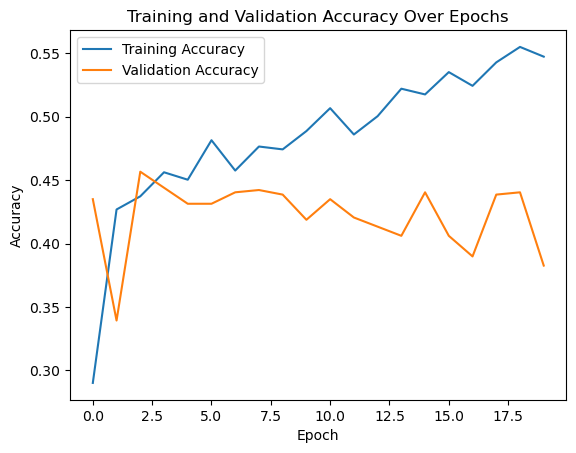

In [181]:
# Plot training and validation accuracy from the best cnn
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy Over Epochs')
plt.legend()
plt.show()

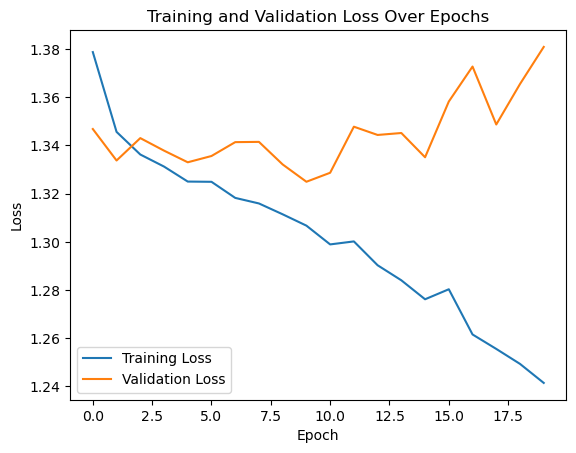

In [183]:
# Plot training and validation loss from the best cnn
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.show()

Despite including the dropout technique for regularization, the best model slightly overfits the training data. Now it will be reimplemented with different learning rates and/or dropout values

In [185]:
%store X_train

Stored 'X_train' (ndarray)


In [186]:
%store y_train

Stored 'y_train' (ndarray)


In [187]:
%store X_val
%store y_val

Stored 'X_val' (ndarray)
Stored 'y_val' (ndarray)
